In [782]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as spy

***Data import***

*Section 1*

In [1435]:
teams = pd.read_csv("MDataFiles_Stage1/MTeams.csv")
seasons = pd.read_csv("MDataFiles_Stage1/MSeasons.csv")
tourney_seeds = pd.read_csv("MDataFiles_Stage1/MNCAATourneySeeds.csv")
reg_season_result = pd.read_csv("MDataFiles_Stage1/MRegularSeasonCompactResults.csv")
tournament_result = pd.read_csv("MDataFiles_Stage1/MNCAATourneyCompactResults.csv")

*Section 2*

Game-by-game stats

In [3]:
reg_season_gbg = pd.read_csv("MDataFiles_Stage1/MRegularSeasonDetailedResults.csv")
tournament_gbg = pd.read_csv("MDataFiles_Stage1/MNCAATourneyDetailedResults.csv")

*Section 3*

In [4]:
cities = pd.read_csv("MDataFiles_Stage1/Cities.csv")
game_cities = pd.read_csv("MDataFiles_Stage1/MGameCities.csv")

*Section 4*

In [5]:
rankings = pd.read_csv("MDataFiles_Stage1/MMasseyOrdinals.csv")

*Section 5*

Play-by-play

In [1019]:
events_2015 = pd.read_csv("MEvents2015.csv")
events_2016 = pd.read_csv("MEvents2016.csv")
events_2017 = pd.read_csv("MEvents2017.csv")
events_2018 = pd.read_csv("MEvents2018.csv")
events_2019 = pd.read_csv("MEvents2019.csv")

<h2>Overall season analysis</h2>

In [6]:
#Team data
teams.sort_values('FirstD1Season',ascending=False).head()

,TeamID,TeamName,FirstD1Season,LastD1Season
366,1467,Merrimack,2020,2020
365,1466,North Alabama,2019,2020
364,1465,Cal Baptist,2019,2020
112,1213,Grand Canyon,2014,2020
161,1262,MA Lowell,2014,2020


In [7]:
#Season data
seasons.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [8]:
#Tourney Seed data
tourney_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [9]:
#Add team name on tourney_seeds
seed_with_team = pd.merge(tourney_seeds, teams).drop(['FirstD1Season', 'LastD1Season'], axis=1)

In [10]:
#Regular season results
reg_season_result.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [11]:
#Tournament results
tournament_result.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [12]:
winning_team_added = reg_season_result.merge(teams[['TeamName', 'TeamID']], left_on='WTeamID',right_on='TeamID').drop('TeamID', axis=1).rename(columns={'TeamName':'WTeamName'})

In [13]:
reg_season_result = winning_team_added.merge(teams[['TeamName','TeamID']], left_on='LTeamID', right_on='TeamID').drop('TeamID',axis=1).rename(columns={'TeamName':'LTeamName'})

In [14]:
reg_season_result.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName
0,1985,20,1228,81,1328,64,N,0,Illinois,Oklahoma
1,1985,33,1228,73,1328,70,H,0,Illinois,Oklahoma
2,1990,82,1112,78,1328,74,H,0,Arizona,Oklahoma
3,2011,34,1112,83,1328,60,H,0,Arizona,Oklahoma
4,1985,118,1242,82,1328,76,H,0,Kansas,Oklahoma


In [15]:
winning_team_added = tournament_result.merge(teams[['TeamName', 'TeamID']], left_on='WTeamID',right_on='TeamID').drop('TeamID', axis=1).rename(columns={'TeamName':'WTeamName'})
tournament_result = winning_team_added.merge(teams[['TeamName','TeamID']], left_on='LTeamID', right_on='TeamID').drop('TeamID',axis=1).rename(columns={'TeamName':'LTeamName'})

In [16]:
tournament_result.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName
0,1985,136,1116,63,1234,54,N,0,Arkansas,Iowa
1,1997,138,1246,75,1234,69,N,0,Kentucky,Iowa
2,2001,138,1246,92,1234,79,N,0,Kentucky,Iowa
3,1987,146,1424,84,1234,81,N,0,UNLV,Iowa
4,1991,138,1181,85,1234,70,N,0,Duke,Iowa


In [17]:
#Add score difference
reg_season_result['Score_diff_pure'] = reg_season_result['WScore'] - reg_season_result['LScore']

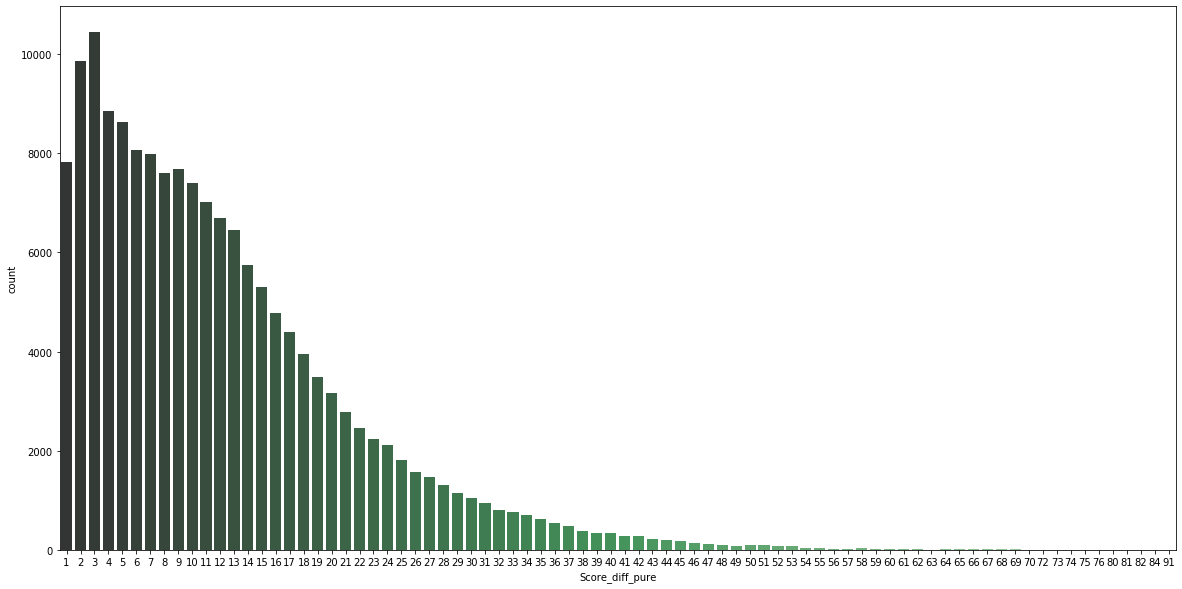

In [18]:
f,ax = plt.subplots(figsize=(20,10))
sns.countplot(x="Score_diff_pure", data=reg_season_result, palette="Greens_d")

In [19]:
tournament_result['Score_diff_pure'] = tournament_result['WScore'] - tournament_result['LScore']

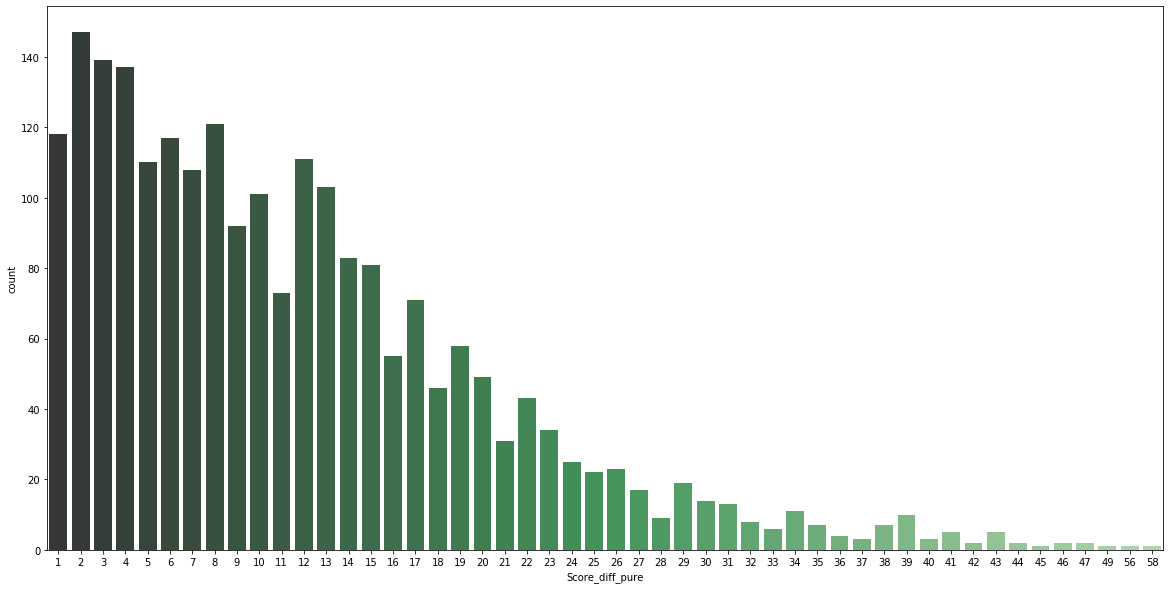

In [20]:
f,ax = plt.subplots(figsize=(20,10))
sns.countplot(x="Score_diff_pure", data=tournament_result, palette="Greens_d")

<h5>It's lighter right skerwed distribution than the regular season which make sense because fewer games are played in the tournament.</h5>

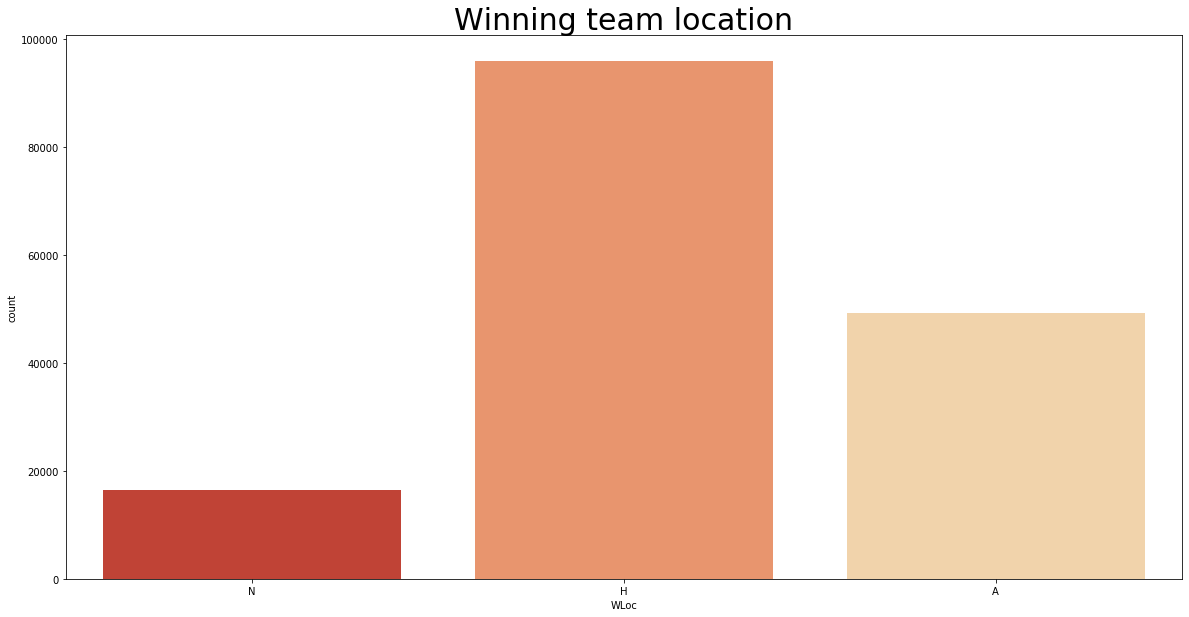

In [21]:
f,ax = plt.subplots(figsize=(20,10))
plt.title("Winning team location",fontsize=30)
sns.countplot(x="WLoc", data=reg_season_result, palette="OrRd_r")

<h5>We could tell from the graph that through out the regular season, home teams have won most of the game.</h5>

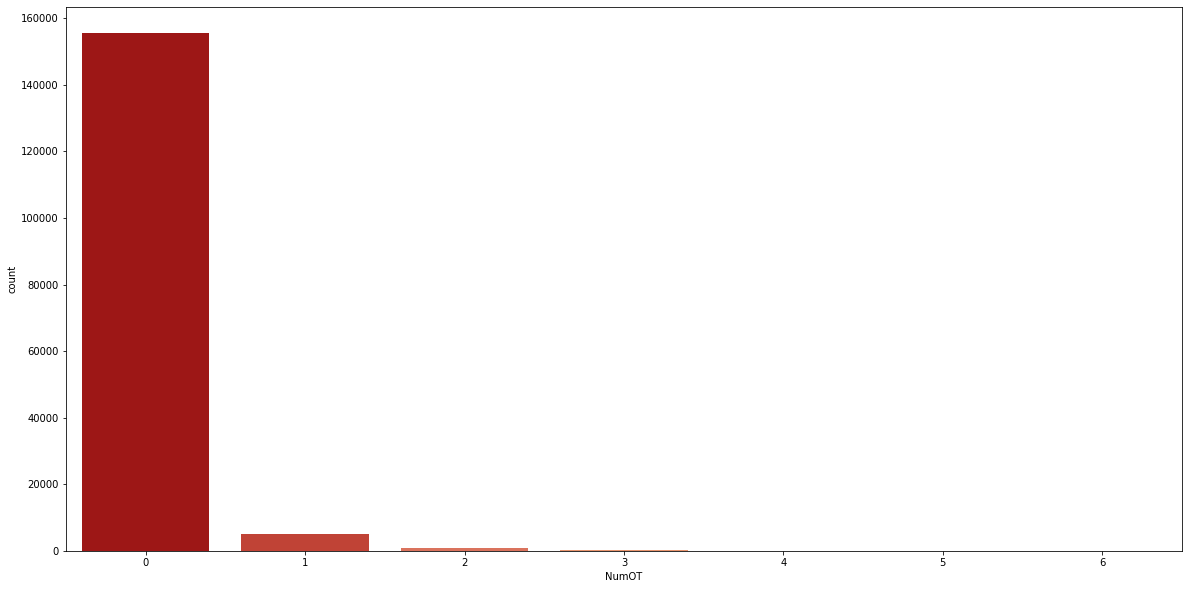

In [22]:
f,ax = plt.subplots(figsize=(20,10))
sns.countplot(x="NumOT", data=reg_season_result, palette="OrRd_r")

<h5>As we assumed most of the game ends before overtime</h5>

In [23]:
tourney_seeds = tourney_seeds.merge(teams[['TeamName', 'TeamID']], left_on='TeamID', right_on='TeamID')

In [24]:
seed_appearance= pd.DataFrame(columns = ['TeamName', 'Seed Appearance'])
for team in teams['TeamName']:
    appearance = tourney_seeds.loc[tourney_seeds['TeamName'] == team]['Season'].count()
    seed_appearance = seed_appearance.append({'TeamName':team,'Seed Appearance':appearance}, ignore_index=True)

In [25]:
seed_appearance = seed_appearance.sort_values('Seed Appearance',ascending=False)

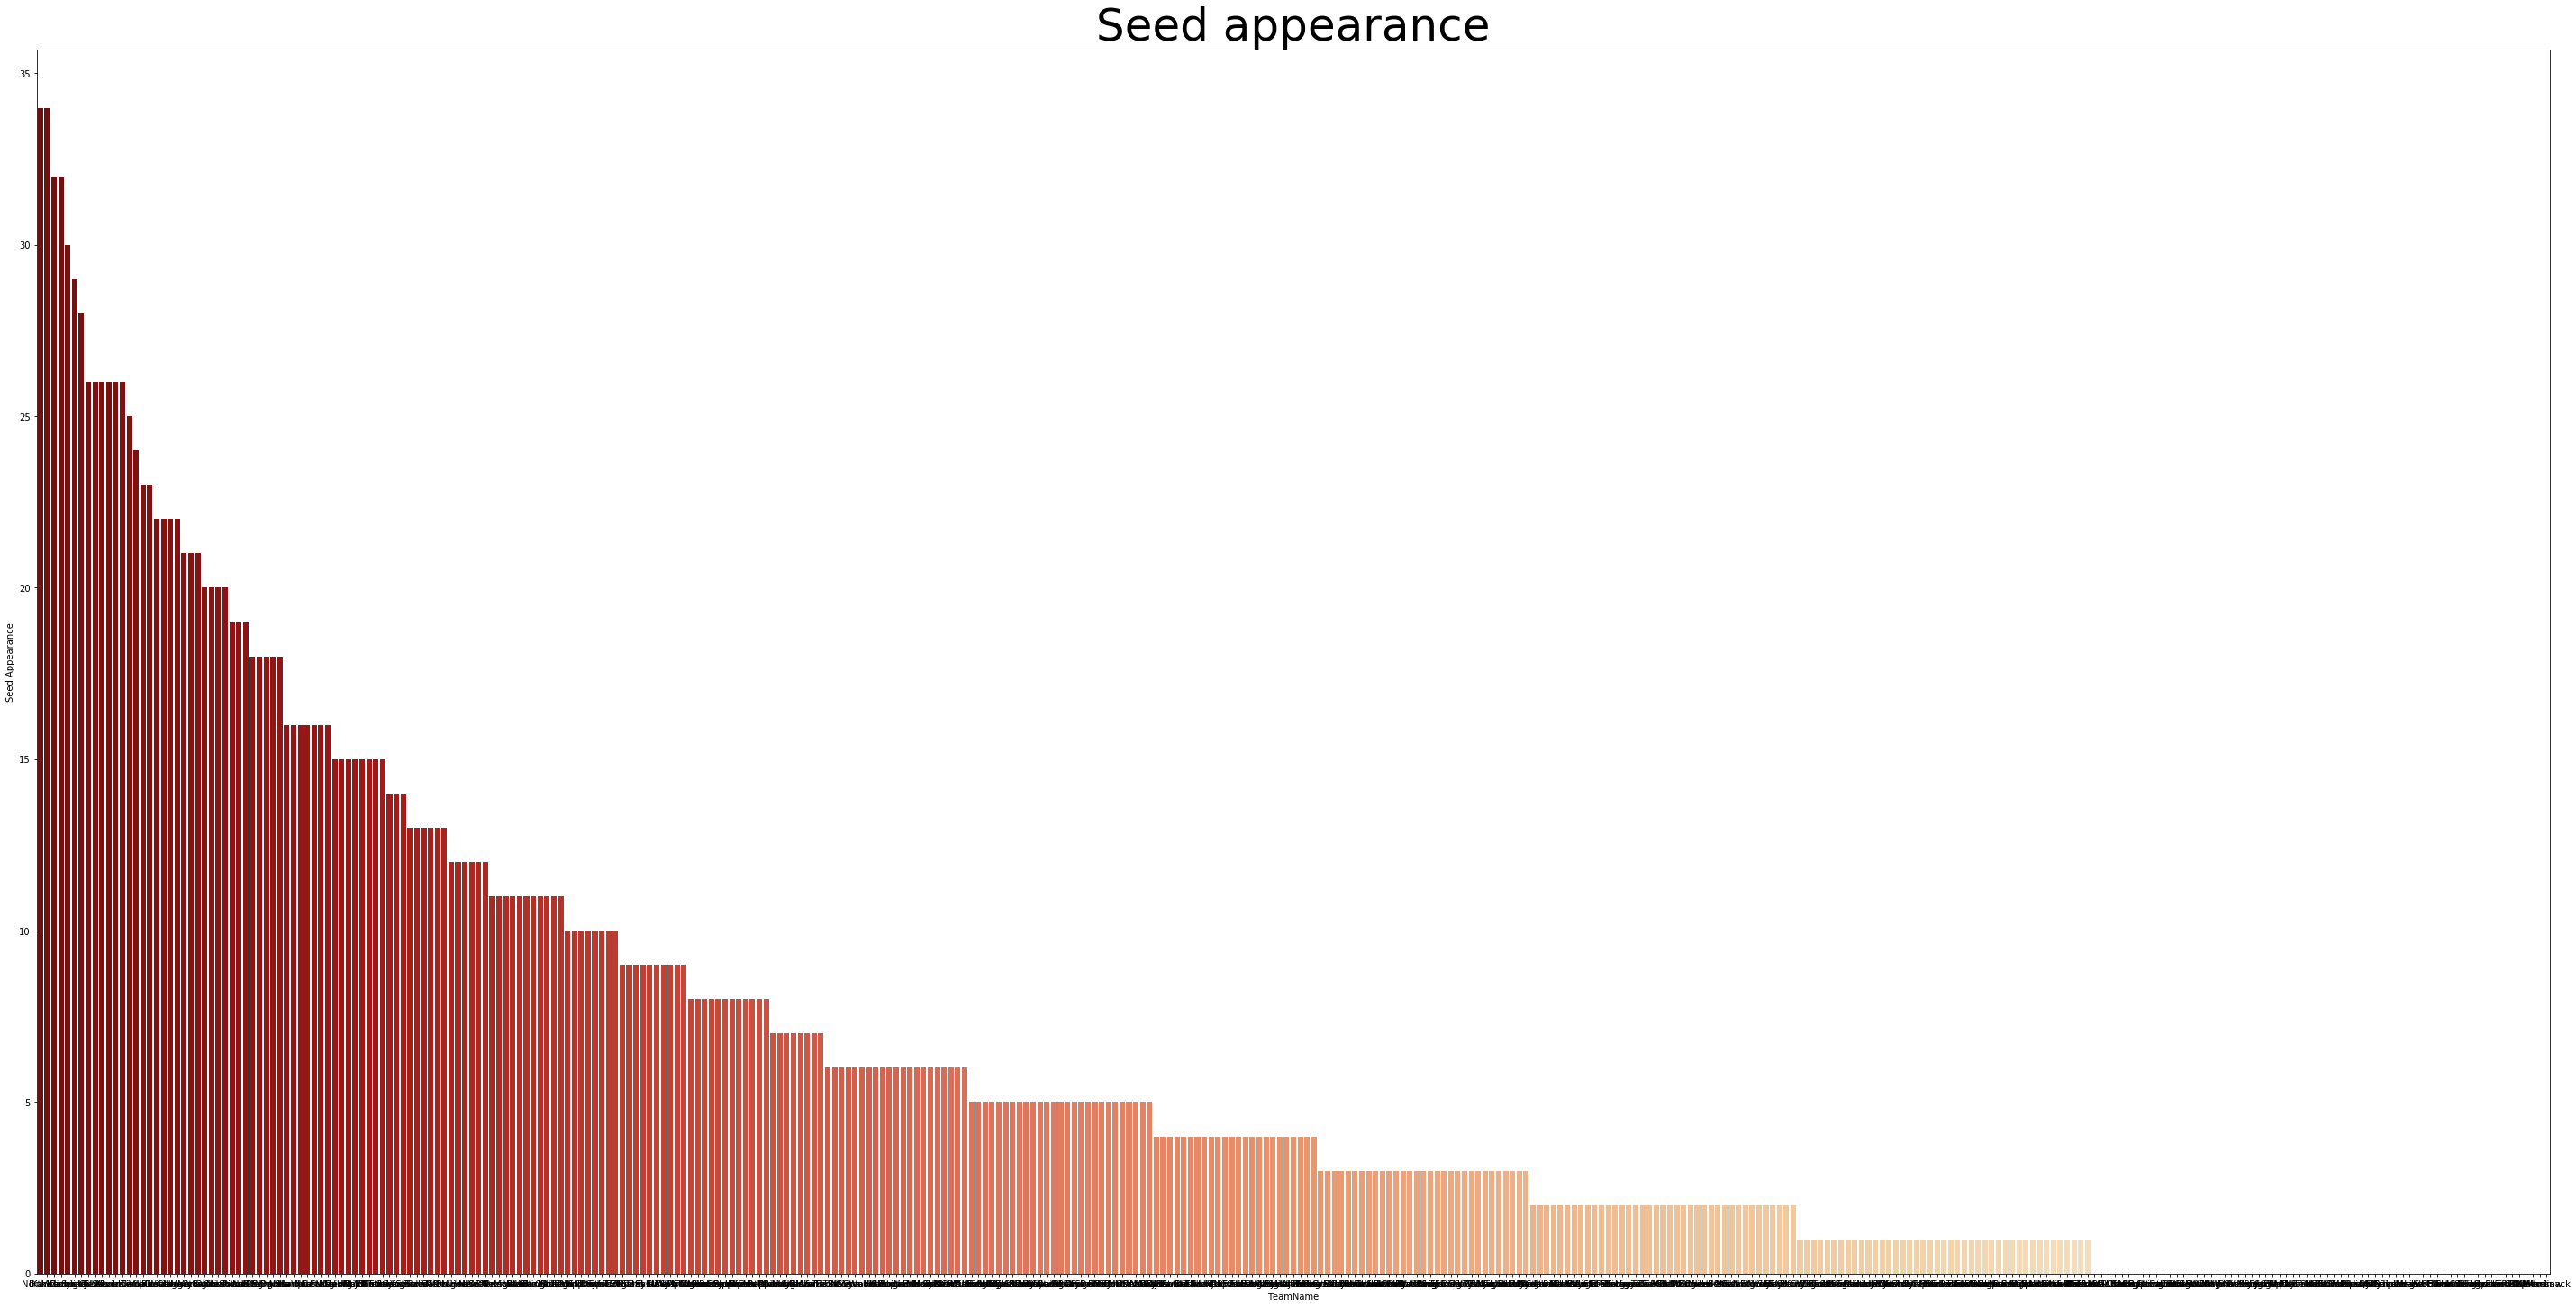

In [26]:
f,ax = plt.subplots(figsize=(50,25))
plt.title("Seed appearance", fontsize=50)
sns.barplot(x='TeamName',y='Seed Appearance',data=seed_appearance,palette='OrRd_r')

<h2>Single season analysis</h2>
<h4>Now let's break the game down into seasons, I decide to look at the past 5 years first since earlier seasons wouldn't play that much role in predicting 2020 season</h4>

In [27]:
reg_season_result.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure
0,1985,20,1228,81,1328,64,N,0,Illinois,Oklahoma,17
1,1985,33,1228,73,1328,70,H,0,Illinois,Oklahoma,3
2,1990,82,1112,78,1328,74,H,0,Arizona,Oklahoma,4
3,2011,34,1112,83,1328,60,H,0,Arizona,Oklahoma,23
4,1985,118,1242,82,1328,76,H,0,Kansas,Oklahoma,6


In [28]:
tournament_result.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure
0,1985,136,1116,63,1234,54,N,0,Arkansas,Iowa,9
1,1997,138,1246,75,1234,69,N,0,Kentucky,Iowa,6
2,2001,138,1246,92,1234,79,N,0,Kentucky,Iowa,13
3,1987,146,1424,84,1234,81,N,0,UNLV,Iowa,3
4,1991,138,1181,85,1234,70,N,0,Duke,Iowa,15


In [1321]:
reg_season_sep = []
tournament_sep = []
for year in [2015, 2016, 2017, 2018, 2019]:
    reg_season_sep.append(reg_season_result.loc[reg_season_result['Season'] == year])
    tournament_sep.append(tournament_result.loc[tournament_result['Season'] == year])

In [1322]:
tournament_seeds = []
for year in [2015, 2016, 2017, 2018, 2019]:
    tournament_seeds.append(tourney_seeds.groupby(['Season']).get_group(year))

In [1323]:
for i in range(5):
    tournament_sep[i] = tournament_sep[i].sort_values('DayNum')

In [1324]:
tournament_seeds[0]

,Season,Seed,TeamID,TeamName
20,2015,X04,1207,Georgetown
63,2015,X06,1374,SMU
75,2015,W10,1208,Georgia
151,2015,Y07,1455,Wichita St
180,2015,Y14,1318,Northeastern
...,...,...,...,...
2244,2015,Z12,1459,Wofford
2251,2015,Z13,1217,Harvard
2266,2015,W13,1414,UC Irvine
2268,2015,X16a,1316,North Florida


In [662]:
#Merge won and lost team seeds into tournament_sep
for i in range(5):
    winning_teams = tournament_sep[i].merge(tournament_seeds[i][['TeamID', 'Seed']], left_on='WTeamID',right_on='TeamID').drop('TeamID', axis=1).rename(columns={"Seed":"WTeamSeed"})
    tournament_sep[i] = winning_teams.merge(tournament_seeds[i][['TeamID','Seed']], left_on='LTeamID', right_on='TeamID').drop('TeamID',axis=1).rename(columns={'Seed':'LTeamSeed'})

In [663]:
tournament_sep[0]['WTeamSeed'][4:5][4][1:3]

'11'

In [664]:
for j in range(5):
    tournament_sep[j]['WTeamSeedPure'] = tournament_sep[j]['WTeamSeed']
    tournament_sep[j]['LTeamSeedPure'] = tournament_sep[j]['LTeamSeed']
    for i in (tournament_sep[0].index):
        tournament_sep[j]['WTeamSeedPure'][i] = tournament_sep[j]['WTeamSeed'][i][1:3]
        tournament_sep[j]['LTeamSeedPure'][i] = tournament_sep[j]['LTeamSeed'][i][1:3]

d:\python demo\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
d:\python demo\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [665]:
tournament_sep[1]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure,WTeamSeed,LTeamSeed,WTeamSeedPure,LTeamSeedPure
0,2016,134,1455,70,1435,50,N,0,Wichita St,Vanderbilt,20,Y11b,Y11a,11,11
1,2016,136,1455,65,1112,55,N,0,Wichita St,Arizona,10,Y11b,Y06,11,06
2,2016,134,1195,96,1192,65,N,0,FL Gulf Coast,F Dickinson,31,W16b,W16a,16,16
3,2016,135,1221,59,1380,55,N,0,Holy Cross,Southern Univ,4,Z16a,Z16b,16,16
4,2016,135,1276,67,1409,62,N,0,Michigan,Tulsa,5,W11a,W11b,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2016,145,1328,80,1332,68,N,0,Oklahoma,Oregon,12,Z02,Z01,02,01
63,2016,137,1234,72,1396,70,N,1,Iowa,Temple,2,Y07,Y10,07,10
64,2016,137,1268,79,1355,74,N,0,Maryland,S Dakota St,5,Y05,Y12,05,12
65,2016,139,1268,73,1218,60,N,0,Maryland,Hawaii,13,Y05,Y13,05,13


In [1267]:
"""
This function create ID label for each game
Recalculate seed_diff
"""
def featureAddition(dataset):
    for index, row in dataset.iterrows():
#         seed_diff = int(row['WTeamSeedPure']) - int(row['LTeamSeedPure'])
        lower_ID = row['WTeamID']
        higher_ID = row['LTeamID']
#         ranking_diff = int(row['WRanking']) - int(row['LRanking'])
        if lower_ID > higher_ID:
            tmp = lower_ID
            lower_ID = higher_ID
            higher_ID = tmp
#             ranking_diff = int(row['LRanking']) - int(row['WRanking'])
#             seed_diff = int(row['LTeamSeedPure']) - int(row['WTeamSeedPure'])
        #Id
        dataset.loc[index, 'ID'] = (str(row['Season']) + "_" + str(lower_ID) + "_" + str(higher_ID))
        #Label
        if lower_ID == row['WTeamID']:
            dataset.loc[index,'lower_win'] = 1
        else:
            dataset.loc[index,'lower_win'] = 0
#         #Score diff
#         dataset.loc[index, 'Score_diff'] = int(score_diff)
#         #Seed diff
#         dataset.loc[index, 'Seed_diff'] = seed_diff
        #Ranking diff
#         dataset.loc[index, 'Ranking_diff'] = ranking_diff

In [667]:
featureAddition(tournament_sep[0])

In [668]:
tournament_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure,WTeamSeed,LTeamSeed,WTeamSeedPure,LTeamSeedPure,ID,lower_win,Score_diff,Seed_diff
0,2015,134,1214,74,1264,64,N,0,Hampton,Manhattan,10,Y16a,Y16b,16,16,2015_1214_1264,1.0,10.0,0.0
1,2015,134,1279,94,1140,90,N,0,Mississippi,BYU,4,Z11b,Z11a,11,11,2015_1140_1279,0.0,-4.0,0.0
2,2015,135,1352,81,1316,77,N,0,Robert Morris,North Florida,4,X16b,X16a,16,16,2015_1316_1352,0.0,-4.0,0.0
3,2015,135,1173,56,1129,55,N,0,Dayton,Boise St,1,W11b,W11a,11,11,2015_1129_1173,0.0,-1.0,0.0
4,2015,137,1173,66,1344,53,N,0,Dayton,Providence,13,W11b,W06,11,06,2015_1173_1344,1.0,13.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2015,137,1328,69,1107,60,N,0,Oklahoma,SUNY Albany,9,W03,W14,03,14,2015_1107_1328,0.0,-9.0,11.0
63,2015,139,1328,72,1173,66,N,0,Oklahoma,Dayton,6,W03,W11b,03,11,2015_1173_1328,0.0,-6.0,8.0
64,2015,137,1242,75,1308,56,N,0,Kansas,New Mexico St,19,Y02,Y15,02,15,2015_1242_1308,1.0,19.0,-13.0
65,2015,137,1361,76,1385,64,N,0,San Diego St,St John's,12,X08,X09,08,09,2015_1361_1385,1.0,12.0,-1.0


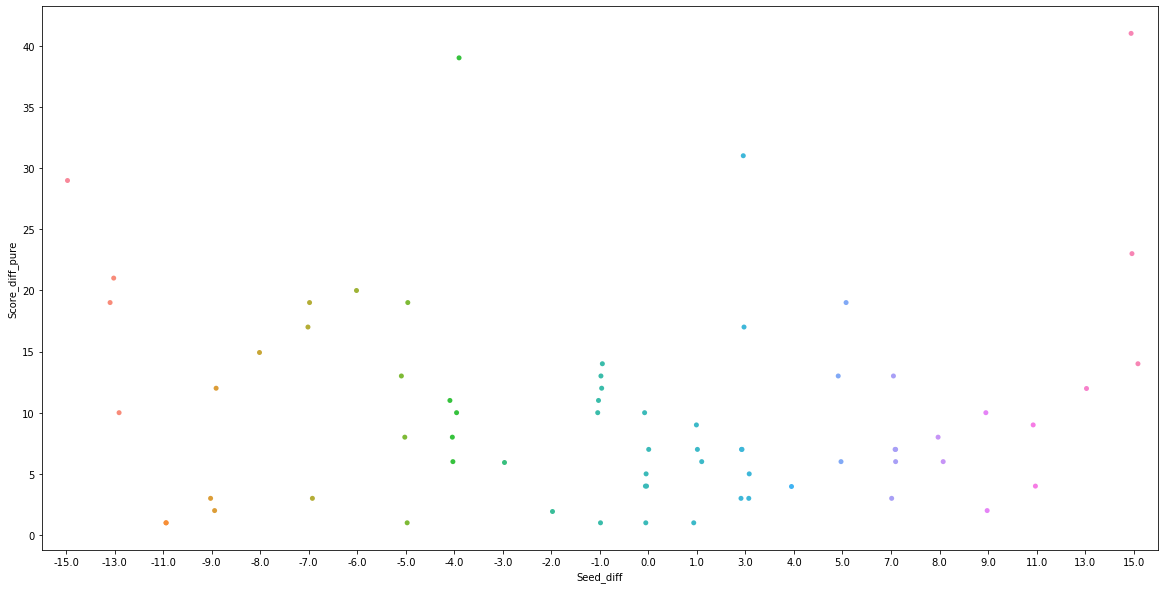

In [185]:
#Plot between Score_diff and Seed_diff
f,ax = plt.subplots(figsize=(20,10))
sns.stripplot(x='Seed_diff',y='Score_diff_pure',data=tournament_sep[0])

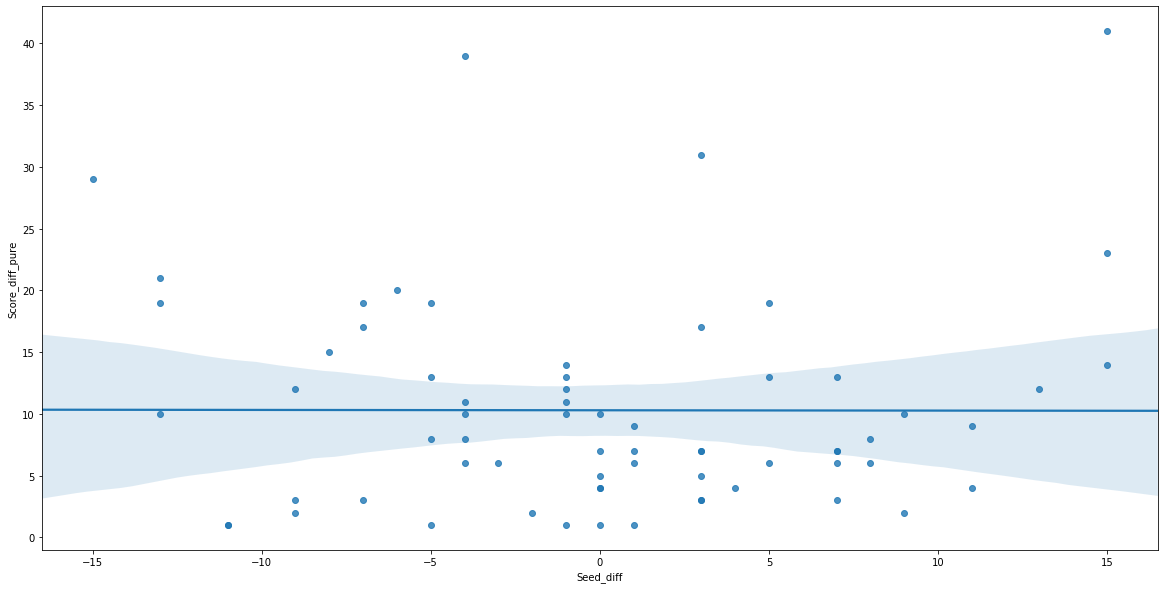

In [186]:
f,ax = plt.subplots(figsize=(20,10))
sns.regplot(x='Seed_diff',y='Score_diff_pure',data=tournament_sep[0],ax=ax)

In [187]:
tournament_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure,WTeamSeed,LTeamSeed,WTeamSeedPure,LTeamSeedPure,ID,lower_win,Score_diff,Seed_diff
0,2015,134,1214,74,1264,64,N,0,Hampton,Manhattan,10,Y16a,Y16b,16,16,2015_1214_1264,1.0,10.0,0.0
1,2015,134,1279,94,1140,90,N,0,Mississippi,BYU,4,Z11b,Z11a,11,11,2015_1140_1279,0.0,-4.0,0.0
2,2015,135,1352,81,1316,77,N,0,Robert Morris,North Florida,4,X16b,X16a,16,16,2015_1316_1352,0.0,-4.0,0.0
3,2015,135,1173,56,1129,55,N,0,Dayton,Boise St,1,W11b,W11a,11,11,2015_1129_1173,0.0,-1.0,0.0
4,2015,137,1173,66,1344,53,N,0,Dayton,Providence,13,W11b,W06,11,06,2015_1173_1344,1.0,13.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2015,137,1328,69,1107,60,N,0,Oklahoma,SUNY Albany,9,W03,W14,03,14,2015_1107_1328,0.0,-9.0,11.0
63,2015,139,1328,72,1173,66,N,0,Oklahoma,Dayton,6,W03,W11b,03,11,2015_1173_1328,0.0,-6.0,8.0
64,2015,137,1242,75,1308,56,N,0,Kansas,New Mexico St,19,Y02,Y15,02,15,2015_1242_1308,1.0,19.0,-13.0
65,2015,137,1361,76,1385,64,N,0,San Diego St,St John's,12,X08,X09,08,09,2015_1361_1385,1.0,12.0,-1.0


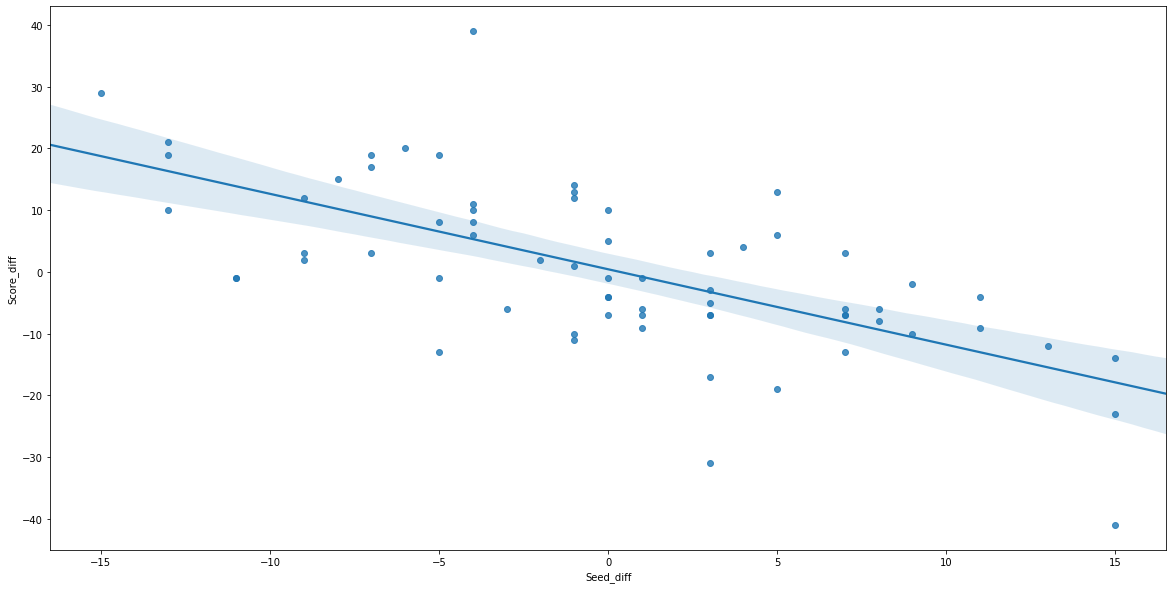

In [188]:
f,ax = plt.subplots(figsize=(20,10))
sns.regplot(x='Seed_diff',y='Score_diff',data=tournament_sep[0],ax=ax)

<h5>TODO:</h5>

* Relationship between scorediff and seeddiff
* Proportion of win by difference in seeds
* Offensive efficiency
* Defensive efficiency
* Winning streak

<h3>Rankings</h3>

In [846]:
teams[teams['TeamID']==1246]

,TeamID,TeamName,FirstD1Season,LastD1Season,AvgRanking_2015
145,1246,Kentucky,1985,2020,1.3


In [1394]:
last_day_ranking = rankings.loc[(rankings['RankingDayNum'] == 133)&(rankings['Season'] > 2010)].sort_values(['Season','OrdinalRank'])

In [1397]:
last_day_ranking_2015 = last_day_ranking[last_day_ranking['Season'] == 2011]

In [1408]:
int(last_day_ranking_2015['OrdinalRank'].tail(1).values)

345

In [838]:
a = last_day_ranking_2015[last_day_ranking_2015['OrdinalRank'] == 4]['TeamID'].value_counts()

14

In [839]:
favored_team = []
for rank in range(352):
    single_rank = last_day_ranking_2015[last_day_ranking_2015['OrdinalRank'] == rank]
    value_count = single_rank['TeamID'].value_counts()
    for index in value_count.index:
        if index not in favored_team:
            favored_team.append(index)
    print('Rank {} done'.format(rank))

Rank 0 done
Rank 1 done
Rank 2 done
Rank 3 done
Rank 4 done
Rank 5 done
Rank 6 done
Rank 7 done
Rank 8 done
Rank 9 done
Rank 10 done
Rank 11 done
Rank 12 done
Rank 13 done
Rank 14 done
Rank 15 done
Rank 16 done
Rank 17 done
Rank 18 done
Rank 19 done
Rank 20 done
Rank 21 done
Rank 22 done
Rank 23 done
Rank 24 done
Rank 25 done
Rank 26 done
Rank 27 done
Rank 28 done
Rank 29 done
Rank 30 done
Rank 31 done
Rank 32 done
Rank 33 done
Rank 34 done
Rank 35 done
Rank 36 done
Rank 37 done
Rank 38 done
Rank 39 done
Rank 40 done
Rank 41 done
Rank 42 done
Rank 43 done
Rank 44 done
Rank 45 done
Rank 46 done
Rank 47 done
Rank 48 done
Rank 49 done
Rank 50 done
Rank 51 done
Rank 52 done
Rank 53 done
Rank 54 done
Rank 55 done
Rank 56 done
Rank 57 done
Rank 58 done
Rank 59 done
Rank 60 done
Rank 61 done
Rank 62 done
Rank 63 done
Rank 64 done
Rank 65 done
Rank 66 done
Rank 67 done
Rank 68 done
Rank 69 done
Rank 70 done
Rank 71 done
Rank 72 done
Rank 73 done
Rank 74 done
Rank 75 done
Rank 76 done
Rank 77 d

In [851]:
favored_team

[1246,
 1112,
 1437,
 1458,
 1181,
 1211,
 1438,
 1242,
 1268,
 1323,
 1428,
 1314,
 1235,
 1124,
 1455,
 1320,
 1328,
 1326,
 1257,
 1372,
 1277,
 1234,
 1374,
 1116,
 1433,
 1139,
 1293,
 1355,
 1172,
 1207,
 1452,
 1332,
 1462,
 1344,
 1417,
 1385,
 1400,
 1140,
 1261,
 1161,
 1461,
 1361,
 1129,
 1434,
 1350,
 1330,
 1301,
 1459,
 1231,
 1173,
 1343,
 1208,
 1274,
 1153,
 1196,
 1393,
 1138,
 1435,
 1329,
 1278,
 1388,
 1233,
 1228,
 1345,
 1396,
 1279,
 1217,
 1409,
 1390,
 1358,
 1276,
 1401,
 1256,
 1453,
 1395,
 1300,
 1348,
 1338,
 1364,
 1209,
 1413,
 1163,
 1272,
 1186,
 1243,
 1336,
 1107,
 1371,
 1229,
 1463,
 1376,
 1199,
 1203,
 1104,
 1155,
 1113,
 1141,
 1166,
 1456,
 1431,
 1397,
 1414,
 1220,
 1219,
 1143,
 1308,
 1424,
 1160,
 1318,
 1269,
 1210,
 1157,
 1266,
 1405,
 1382,
 1457,
 1132,
 1185,
 1156,
 1449,
 1333,
 1367,
 1295,
 1321,
 1264,
 1151,
 1245,
 1316,
 1130,
 1292,
 1184,
 1204,
 1103,
 1120,
 1392,
 1412,
 1304,
 1218,
 1125,
 1360,
 1247,
 1162,
 1337,

In [895]:
ranking = range(1,352)
ranking_133 = pd.DataFrame({'TeamID':favored_team,'Ranking':ranking})
team_rank = ranking_133[ranking_133['TeamID'] == 1181]['Ranking']
ranking_133

,TeamID,Ranking
0,1246,1
1,1112,2
2,1437,3
3,1458,4
4,1181,5
...,...,...
346,1263,347
347,1108,348
348,1146,349
349,1197,350


In [905]:
teams = teams.merge(ranking_133, left_on='TeamID',right_on='TeamID')

In [912]:
teams

,TeamID,TeamName,FirstD1Season,LastD1Season,AvgRanking_2015,Ranking
0,1101,Abilene Chr,2014,2020,316.34,334
1,1102,Air Force,1985,2020,203.63,225
2,1103,Akron,1985,2020,112.63,133
3,1104,Alabama,1985,2020,64.11,94
4,1105,Alabama A&M,2000,2020,332.23,333
...,...,...,...,...,...,...
346,1460,Wright St,1988,2020,201.08,276
347,1461,Wyoming,1985,2020,80.58,41
348,1462,Xavier,1985,2020,33.78,33
349,1463,Yale,1985,2020,92.54,90


In [128]:
print("We have",len(rankings['SystemName'].unique()),"ranking systems")

We have 174 ranking systems


In [129]:
def rankingSysInfo(rankingSys,teamID):
    day_eval = {}
    team_rank = {}
    groupByTeam = rankings.loc[(rankings['SystemName'] == rankingSys)&(rankings['TeamID'] == teamID)].sort_values('RankingDayNum').groupby(['Season'])
    for name, group in groupByTeam:
        team_rank[name-2014] = group['OrdinalRank']
        day_eval[name-2014] = group['RankingDayNum']
    return day_eval, team_rank

In [130]:
def plotAcrossSeasons(season,position,teamID):
    plt.figure(figsize=(20,10))
    for rankingSys in (rankings['SystemName'].unique()):
        if len(rankings.loc[(rankings['SystemName'] == rankingSys)&(rankings['TeamID'] == teamID)&(rankings['Season'] == season)]) != 0:
            day_eval, team_rank = rankingSysInfo(rankingSys,teamID)
            single_season_trend = pd.DataFrame({"Day": day_eval[season-2014], "Rank": team_rank[season-2014]})
            plt.plot(single_season_trend["Day"],single_season_trend["Rank"],label=rankingSys)
    plt.title(season)
    plt.xlabel('Days')
    plt.ylabel('Rank')
    plt.legend()

In [131]:
rankings.loc[(rankings['SystemName'] == 'AP')&(rankings['TeamID'] == 1101)&(rankings['Season'] == 2014)]

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank


In [132]:
day_eval, team_rank = rankingSysInfo('lol', 1101)
list(team_rank.keys())

[]

In [260]:
def findAverageRank(teamID,season):
    avg = []
    for rankingSys in (rankings['SystemName'].unique()):
        day_eval, team_rank = rankingSysInfo(rankingSys, teamID)
        if (season-2014) in list(team_rank.keys()):
            avg.append(team_rank[season-2014].mean())
    return round(np.mean(avg))

In [261]:
findAverageRank(1101,2015)

316.0

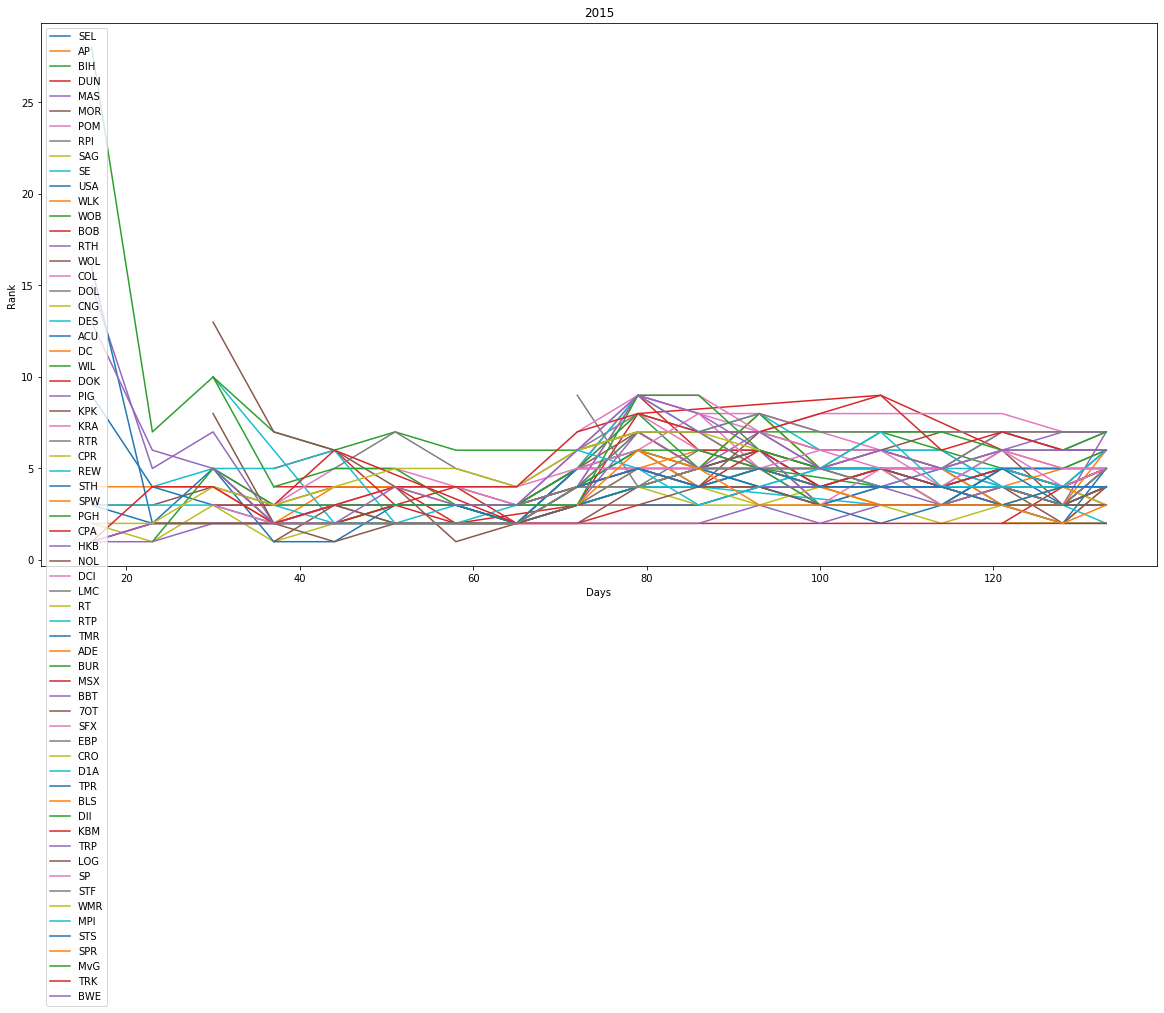

In [52]:
x=[2014,2015,2016,2017,2018,2019]
position = [121,122,221,222,321,322]
plotAcrossSeasons(2015, position,1181)

<h3>Event Data</h3>

In [205]:
mens_events = []
for year in [2015, 2016, 2017, 2018, 2019]:
    mens_events.append(pd.read_csv(f"MEvents{year}.csv"))

In [152]:
MEvents = pd.concat(mens_events)

In [155]:
MEvents.shape

(13149684, 17)

In [158]:
MEvents.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area,counter
0,1,2015,11,1103,1420,74,57,0,0,19,1103,100,miss3,unk,0,0,0,1
1,2,2015,11,1103,1420,74,57,0,0,19,1420,11784,reb,def,0,0,0,1
2,3,2015,11,1103,1420,74,57,0,0,27,1420,11789,made2,dunk,0,0,0,1
3,4,2015,11,1103,1420,74,57,0,0,27,1420,11803,assist,NaN,0,0,0,1
4,5,2015,11,1103,1420,74,57,0,0,59,1103,87,made2,jump,0,0,0,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

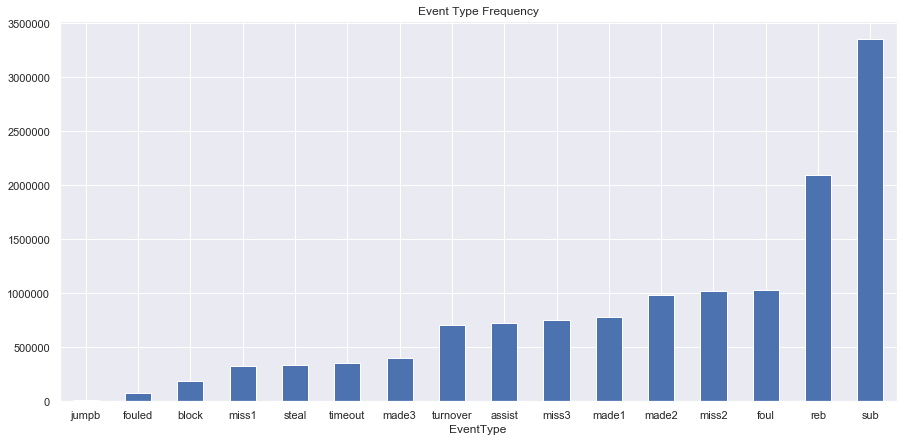

In [166]:
#EventType
MEvents['counter'] = 1
MEvents.groupby("EventType")['counter'].sum().sort_values().plot(kind='bar', figsize=(15,7),title='Event Type Frequency')
plt.xticks(rotation=0)

<h2>Logistic regression on single score_diff feature</h2> <h5>2015-tournament</h5>

In [1148]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [670]:
reg_season_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure
40,2015,77,1242,85,1328,78,H,0,Kansas,Oklahoma,7
84,2015,68,1243,66,1328,63,A,1,Kansas St,Oklahoma,3
85,2015,103,1243,59,1328,56,H,0,Kansas St,Oklahoma,3
120,2015,25,1458,69,1328,56,N,0,Wisconsin,Oklahoma,13
145,2015,82,1124,69,1328,58,H,0,Baylor,Oklahoma,11
...,...,...,...,...,...,...,...,...,...,...,...
161500,2015,68,1322,103,1230,101,H,0,Northwestern LA,Incarnate Word,2
161520,2015,61,1358,84,1230,78,H,0,Sam Houston St,Incarnate Word,6
161526,2015,105,1372,90,1230,76,A,0,SF Austin,Incarnate Word,14
161527,2015,119,1372,83,1230,62,H,0,SF Austin,Incarnate Word,21


In [671]:
tournament_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure,WTeamSeed,LTeamSeed,WTeamSeedPure,LTeamSeedPure,ID,lower_win,Score_diff,Seed_diff
0,2015,134,1214,74,1264,64,N,0,Hampton,Manhattan,10,Y16a,Y16b,16,16,2015_1214_1264,1.0,10.0,0.0
1,2015,134,1279,94,1140,90,N,0,Mississippi,BYU,4,Z11b,Z11a,11,11,2015_1140_1279,0.0,-4.0,0.0
2,2015,135,1352,81,1316,77,N,0,Robert Morris,North Florida,4,X16b,X16a,16,16,2015_1316_1352,0.0,-4.0,0.0
3,2015,135,1173,56,1129,55,N,0,Dayton,Boise St,1,W11b,W11a,11,11,2015_1129_1173,0.0,-1.0,0.0
4,2015,137,1173,66,1344,53,N,0,Dayton,Providence,13,W11b,W06,11,06,2015_1173_1344,1.0,13.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2015,137,1328,69,1107,60,N,0,Oklahoma,SUNY Albany,9,W03,W14,03,14,2015_1107_1328,0.0,-9.0,11.0
63,2015,139,1328,72,1173,66,N,0,Oklahoma,Dayton,6,W03,W11b,03,11,2015_1173_1328,0.0,-6.0,8.0
64,2015,137,1242,75,1308,56,N,0,Kansas,New Mexico St,19,Y02,Y15,02,15,2015_1242_1308,1.0,19.0,-13.0
65,2015,137,1361,76,1385,64,N,0,San Diego St,St John's,12,X08,X09,08,09,2015_1361_1385,1.0,12.0,-1.0


In [672]:
def generateTrainSet(dataset):
    train_set = pd.DataFrame({"ID":dataset['ID'],"Seed_diff":dataset['Seed_diff'],"Lower_win":dataset['lower_win']})
    return train_set

In [673]:
train_2015_tournament = generateTrainSet(tournament_sep[0])
train_2015_tournament.head(20)

,ID,Seed_diff,Lower_win
0,2015_1214_1264,0.0,1.0
1,2015_1140_1279,0.0,0.0
2,2015_1316_1352,0.0,0.0
3,2015_1129_1173,0.0,0.0
4,2015_1173_1344,5.0,1.0
5,2015_1124_1209,-11.0,0.0
6,2015_1186_1207,9.0,0.0
7,2015_1374_1417,-5.0,0.0
8,2015_1412_1417,3.0,0.0
9,2015_1214_1246,15.0,0.0


In [674]:
X = train_2015_tournament['Seed_diff']
y = train_2015_tournament['Lower_win']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=33)
X_train.index

Int64Index([49, 51,  0, 47, 26, 48, 32, 28, 17, 64, 34, 61, 10, 65, 50, 55, 63,
            23, 59, 24, 66, 56, 60, 62, 46, 16, 22, 11, 12, 39, 44, 31, 13, 33,
            35, 45, 42, 14, 19, 38,  3, 57,  9, 18,  7, 20],
           dtype='int64')

In [675]:
X_train_np = np.reshape(np.array(X_train), (-1,1))
X_test_np = np.reshape(np.array(X_test), (-1,1))

In [676]:
clf = LogisticRegression(penalty='l2', fit_intercept=False, C=0.0001,
                         verbose=False, max_iter=1000, solver='lbfgs')

In [677]:
clf.fit(X_train_np, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=False,
                   warm_start=False)

In [678]:
pred_test = pd.DataFrame({'ID':train_2015_tournament.loc[X_test.index, 'ID'],
                          'Pred':clf.predict_proba(X_test_np)[:, 0],
                         'Actual':y_test})
pred_test.head(100)

,ID,Pred,Actual
2,2015_1316_1352,0.500000,0.0
52,2015_1138_1452,0.515030,0.0
54,2015_1329_1332,0.502148,0.0
5,2015_1124_1209,0.476391,0.0
6,2015_1186_1207,0.519321,0.0
27,2015_1248_1437,0.532173,0.0
37,2015_1257_1414,0.480679,1.0
43,2015_1314_1458,0.506443,0.0
53,2015_1268_1452,0.497852,0.0
8,2015_1412_1417,0.506443,0.0


In [679]:
test_loss = log_loss(y_test, pred_test['Pred'])
print('test log_loss:{:0.2f}'.format(test_loss))

test log_loss:0.71


In [680]:
print(cross_val_score(clf, X_train_np, y_train, cv = 10, scoring='accuracy', n_jobs=-1).mean())

d:\python demo\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.7933333333333333


<h5>2015-reg-season</h5>

In [681]:
reg_season_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure
40,2015,77,1242,85,1328,78,H,0,Kansas,Oklahoma,7
84,2015,68,1243,66,1328,63,A,1,Kansas St,Oklahoma,3
85,2015,103,1243,59,1328,56,H,0,Kansas St,Oklahoma,3
120,2015,25,1458,69,1328,56,N,0,Wisconsin,Oklahoma,13
145,2015,82,1124,69,1328,58,H,0,Baylor,Oklahoma,11
...,...,...,...,...,...,...,...,...,...,...,...
161500,2015,68,1322,103,1230,101,H,0,Northwestern LA,Incarnate Word,2
161520,2015,61,1358,84,1230,78,H,0,Sam Houston St,Incarnate Word,6
161526,2015,105,1372,90,1230,76,A,0,SF Austin,Incarnate Word,14
161527,2015,119,1372,83,1230,62,H,0,SF Austin,Incarnate Word,21


In [682]:
tournament_seeds[0]

,Season,Seed,TeamID,TeamName
20,2015,X04,1207,Georgetown
63,2015,X06,1374,SMU
75,2015,W10,1208,Georgia
151,2015,Y07,1455,Wichita St
180,2015,Y14,1318,Northeastern
...,...,...,...,...
2244,2015,Z12,1459,Wofford
2251,2015,Z13,1217,Harvard
2266,2015,W13,1414,UC Irvine
2268,2015,X16a,1316,North Florida


In [683]:
#Merge won and lost team seeds into tournament_sep
for i in range(5):
    winning_teams = reg_season_sep[i].merge(tournament_seeds[i][['TeamID', 'Seed']], left_on='WTeamID',right_on='TeamID').drop('TeamID', axis=1).rename(columns={"Seed":"WTeamSeed"})
    reg_season_sep[i] = winning_teams.merge(tournament_seeds[i][['TeamID','Seed']], left_on='LTeamID', right_on='TeamID').drop('TeamID',axis=1).rename(columns={'Seed':'LTeamSeed'})

In [684]:
reg_season_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure,WTeamSeed,LTeamSeed
0,2015,77,1242,85,1328,78,H,0,Kansas,Oklahoma,7,Y02,W03
1,2015,25,1458,69,1328,56,N,0,Wisconsin,Oklahoma,13,Z01,W03
2,2015,82,1124,69,1328,58,H,0,Baylor,Oklahoma,11,Z03,W03
3,2015,119,1235,77,1328,70,H,0,Iowa St,Oklahoma,7,X03,W03
4,2015,130,1235,67,1328,65,N,0,Iowa St,Oklahoma,2,X03,W03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2015,11,1248,77,1352,50,A,0,Lafayette,Robert Morris,27,W16,X16b
305,2015,34,1138,74,1352,59,A,0,Buffalo,Robert Morris,15,Y12,X16b
306,2015,77,1207,78,1437,58,H,0,Georgetown,Villanova,20,X04,W01
307,2015,20,1318,65,1264,51,N,0,Northeastern,Manhattan,14,Y14,Y16b


In [685]:
#Create Pure Numerical seed
for j in range(5):
    reg_season_sep[j]['WTeamSeedPure'] = reg_season_sep[j]['WTeamSeed']
    reg_season_sep[j]['LTeamSeedPure'] = reg_season_sep[j]['LTeamSeed']
    for i in (reg_season_sep[j].index):
        reg_season_sep[j]['WTeamSeedPure'][i] = reg_season_sep[j]['WTeamSeed'][i][1:3]
        reg_season_sep[j]['LTeamSeedPure'][i] = reg_season_sep[j]['LTeamSeed'][i][1:3]

d:\python demo\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\python demo\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [686]:
reg_season_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure,WTeamSeed,LTeamSeed,WTeamSeedPure,LTeamSeedPure
0,2015,77,1242,85,1328,78,H,0,Kansas,Oklahoma,7,Y02,W03,02,03
1,2015,25,1458,69,1328,56,N,0,Wisconsin,Oklahoma,13,Z01,W03,01,03
2,2015,82,1124,69,1328,58,H,0,Baylor,Oklahoma,11,Z03,W03,03,03
3,2015,119,1235,77,1328,70,H,0,Iowa St,Oklahoma,7,X03,W03,03,03
4,2015,130,1235,67,1328,65,N,0,Iowa St,Oklahoma,2,X03,W03,03,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2015,11,1248,77,1352,50,A,0,Lafayette,Robert Morris,27,W16,X16b,16,16
305,2015,34,1138,74,1352,59,A,0,Buffalo,Robert Morris,15,Y12,X16b,12,16
306,2015,77,1207,78,1437,58,H,0,Georgetown,Villanova,20,X04,W01,04,01
307,2015,20,1318,65,1264,51,N,0,Northeastern,Manhattan,14,Y14,Y16b,14,16


In [687]:
featureAddition(reg_season_sep[0])

In [688]:
reg_season_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure,WTeamSeed,LTeamSeed,WTeamSeedPure,LTeamSeedPure,ID,lower_win,Score_diff,Seed_diff
0,2015,77,1242,85,1328,78,H,0,Kansas,Oklahoma,7,Y02,W03,02,03,2015_1242_1328,1.0,7.0,-1.0
1,2015,25,1458,69,1328,56,N,0,Wisconsin,Oklahoma,13,Z01,W03,01,03,2015_1328_1458,0.0,-13.0,2.0
2,2015,82,1124,69,1328,58,H,0,Baylor,Oklahoma,11,Z03,W03,03,03,2015_1124_1328,1.0,11.0,0.0
3,2015,119,1235,77,1328,70,H,0,Iowa St,Oklahoma,7,X03,W03,03,03,2015_1235_1328,1.0,7.0,0.0
4,2015,130,1235,67,1328,65,N,0,Iowa St,Oklahoma,2,X03,W03,03,03,2015_1235_1328,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2015,11,1248,77,1352,50,A,0,Lafayette,Robert Morris,27,W16,X16b,16,16,2015_1248_1352,1.0,27.0,0.0
305,2015,34,1138,74,1352,59,A,0,Buffalo,Robert Morris,15,Y12,X16b,12,16,2015_1138_1352,1.0,15.0,-4.0
306,2015,77,1207,78,1437,58,H,0,Georgetown,Villanova,20,X04,W01,04,01,2015_1207_1437,1.0,20.0,3.0
307,2015,20,1318,65,1264,51,N,0,Northeastern,Manhattan,14,Y14,Y16b,14,16,2015_1264_1318,0.0,-14.0,2.0


In [689]:
train_2015_reg = generateTrainSet(reg_season_sep[0])

In [690]:
train_2015_reg

,ID,Seed_diff,Lower_win
0,2015_1242_1328,-1.0,1.0
1,2015_1328_1458,2.0,0.0
2,2015_1124_1328,0.0,1.0
3,2015_1235_1328,0.0,1.0
4,2015_1235_1328,0.0,1.0
...,...,...,...
304,2015_1248_1352,0.0,1.0
305,2015_1138_1352,-4.0,1.0
306,2015_1207_1437,3.0,1.0
307,2015_1264_1318,2.0,0.0


In [691]:
X = train_2015_reg['Seed_diff']
y = train_2015_reg['Lower_win']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=33)
X_train.index

Int64Index([254, 145, 149, 166,  44, 274, 204,  64, 302, 287,
            ...
            211,  61, 102, 195,  57, 201, 146,  66, 216,  20],
           dtype='int64', length=216)

In [692]:
X_train_np = np.reshape(np.array(X_train), (-1,1))
X_test_np = np.reshape(np.array(X_test), (-1,1))

In [693]:
clf.fit(X_train_np, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=False,
                   warm_start=False)

In [694]:
pred_test_reg = pd.DataFrame({'ID':train_2015_reg.loc[X_test.index, 'ID'],
                          'Pred':clf.predict_proba(X_test_np)[:, 0],
                         'Actual':y_test})
pred_test_reg.head(100)

,ID,Pred,Actual
35,2015_1246_1400,0.440094,1.0
182,2015_1153_1279,0.481949,0.0
276,2015_1234_1295,0.451992,1.0
148,2015_1301_1438,0.536054,0.0
144,2015_1301_1452,0.518051,0.0
...,...,...,...
162,2015_1112_1417,0.446035,1.0
199,2015_1314_1323,0.506019,0.0
196,2015_1181_1323,0.487963,0.0
191,2015_1172_1438,0.548008,0.0


In [695]:
test_acc = np.mean(y_test == pred_test_reg['Pred'])

In [696]:
test_acc

0.0

In [697]:
test_loss = log_loss(y_test, pred_test_reg['Pred'])
print('test log_loss:{:0.2f}'.format(test_loss))

test log_loss:0.73


In [698]:
print(cross_val_score(clf, X_train_np, y_train, cv = 10, scoring='accuracy', n_jobs=-1).mean())

0.7027197440240919


<h5>Using 2015-reg-season to predict tournament</h5>

In [699]:
train_2015_reg

,ID,Seed_diff,Lower_win
0,2015_1242_1328,-1.0,1.0
1,2015_1328_1458,2.0,0.0
2,2015_1124_1328,0.0,1.0
3,2015_1235_1328,0.0,1.0
4,2015_1235_1328,0.0,1.0
...,...,...,...
304,2015_1248_1352,0.0,1.0
305,2015_1138_1352,-4.0,1.0
306,2015_1207_1437,3.0,1.0
307,2015_1264_1318,2.0,0.0


In [700]:
train_2015_tournament

,ID,Seed_diff,Lower_win
0,2015_1214_1264,0.0,1.0
1,2015_1140_1279,0.0,0.0
2,2015_1316_1352,0.0,0.0
3,2015_1129_1173,0.0,0.0
4,2015_1173_1344,5.0,1.0
...,...,...,...
62,2015_1107_1328,11.0,0.0
63,2015_1173_1328,8.0,0.0
64,2015_1242_1308,-13.0,1.0
65,2015_1361_1385,-1.0,1.0


In [992]:
X = train_2015_reg['Seed_diff']
y = train_2015_reg['Lower_win']
X_train_np = np.reshape(np.array(X), (-1,1))
X_test_np = np.reshape(np.array(train_2015_tournament['Seed_diff']), (-1,1))

In [993]:
clf.fit(X_train_np,y)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=False,
                   warm_start=False)

In [994]:
prediction = clf.predict_proba(X_test_np)[:,0]
pred = clf.predict(X_test_np)

In [995]:
test_loss = log_loss(train_2015_tournament['Lower_win'], prediction)
print("test loss:",test_loss)

test loss: 0.7693351123010499


In [1017]:
np.mean(pred == train_2015_tournament['Lower_win'])

0.7910447761194029

In [997]:
print(cross_val_score(clf, X_train_np, y, cv = 10, scoring='accuracy', n_jobs=-1).mean())

0.7154166666666667


<h2>Logistic regression on two features(Seed_diff)(Ranking)</h2>

In [707]:
reg_season_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure,WTeamSeed,LTeamSeed,WTeamSeedPure,LTeamSeedPure,ID,lower_win,Score_diff,Seed_diff
0,2015,77,1242,85,1328,78,H,0,Kansas,Oklahoma,7,Y02,W03,02,03,2015_1242_1328,1.0,7.0,-1.0
1,2015,25,1458,69,1328,56,N,0,Wisconsin,Oklahoma,13,Z01,W03,01,03,2015_1328_1458,0.0,-13.0,2.0
2,2015,82,1124,69,1328,58,H,0,Baylor,Oklahoma,11,Z03,W03,03,03,2015_1124_1328,1.0,11.0,0.0
3,2015,119,1235,77,1328,70,H,0,Iowa St,Oklahoma,7,X03,W03,03,03,2015_1235_1328,1.0,7.0,0.0
4,2015,130,1235,67,1328,65,N,0,Iowa St,Oklahoma,2,X03,W03,03,03,2015_1235_1328,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2015,11,1248,77,1352,50,A,0,Lafayette,Robert Morris,27,W16,X16b,16,16,2015_1248_1352,1.0,27.0,0.0
305,2015,34,1138,74,1352,59,A,0,Buffalo,Robert Morris,15,Y12,X16b,12,16,2015_1138_1352,1.0,15.0,-4.0
306,2015,77,1207,78,1437,58,H,0,Georgetown,Villanova,20,X04,W01,04,01,2015_1207_1437,1.0,20.0,3.0
307,2015,20,1318,65,1264,51,N,0,Northeastern,Manhattan,14,Y14,Y16b,14,16,2015_1264_1318,0.0,-14.0,2.0


In [929]:
tournament_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,...,WTeamSeed,LTeamSeed,WTeamSeedPure,LTeamSeedPure,ID,lower_win,Score_diff,Seed_diff,WRanking,LRanking
0,2015,134,1214,74,1264,64,N,0,Hampton,Manhattan,...,Y16a,Y16b,16,16,2015_1214_1264,1.0,10.0,0.0,216,125
1,2015,134,1279,94,1140,90,N,0,Mississippi,BYU,...,Z11b,Z11a,11,11,2015_1140_1279,0.0,-4.0,0.0,66,38
2,2015,135,1352,81,1316,77,N,0,Robert Morris,North Florida,...,X16b,X16a,16,16,2015_1316_1352,0.0,-4.0,0.0,185,128
3,2015,135,1173,56,1129,55,N,0,Dayton,Boise St,...,W11b,W11a,11,11,2015_1129_1173,0.0,-1.0,0.0,50,43
4,2015,137,1173,66,1344,53,N,0,Dayton,Providence,...,W11b,W06,11,06,2015_1173_1344,1.0,13.0,5.0,50,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2015,137,1328,69,1107,60,N,0,Oklahoma,SUNY Albany,...,W03,W14,03,14,2015_1107_1328,0.0,-9.0,11.0,17,87
63,2015,139,1328,72,1173,66,N,0,Oklahoma,Dayton,...,W03,W11b,03,11,2015_1173_1328,0.0,-6.0,8.0,17,50
64,2015,137,1242,75,1308,56,N,0,Kansas,New Mexico St,...,Y02,Y15,02,15,2015_1242_1308,1.0,19.0,-13.0,8,106
65,2015,137,1361,76,1385,64,N,0,San Diego St,St John's,...,X08,X09,08,09,2015_1361_1385,1.0,12.0,-1.0,42,36


In [94]:
#Create avg_ranking feature DEPRECATED
for index, row in teams.iterrows():
    teams.loc[index,'AvgRanking_2015'] = findAverageRank(row['TeamID'],2015)
    print(row['TeamName'] + '\'s average rank logged!')

Abilene Chr's average rank logged!
Air Force's average rank logged!
Akron's average rank logged!
Alabama's average rank logged!
Alabama A&M's average rank logged!
Alabama St's average rank logged!
SUNY Albany's average rank logged!
Alcorn St's average rank logged!


d:\python demo\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
d:\python demo\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Alliant Intl's average rank logged!
American Univ's average rank logged!
Appalachian St's average rank logged!
Arizona's average rank logged!
Arizona St's average rank logged!
Ark Little Rock's average rank logged!
Ark Pine Bluff's average rank logged!
Arkansas's average rank logged!
Arkansas St's average rank logged!
Armstrong St's average rank logged!
Army's average rank logged!
Auburn's average rank logged!
Augusta's average rank logged!
Austin Peay's average rank logged!
Ball St's average rank logged!
Baylor's average rank logged!
Belmont's average rank logged!
Bethune-Cookman's average rank logged!
Binghamton's average rank logged!
Birmingham So's average rank logged!
Boise St's average rank logged!
Boston College's average rank logged!
Boston Univ's average rank logged!
Bowling Green's average rank logged!
Bradley's average rank logged!
Brooklyn's average rank logged!
Brown's average rank logged!
Bryant's average rank logged!
Bucknell's average rank logged!
Buffalo's average rank

S Illinois's average rank logged!
Sacred Heart's average rank logged!
Sam Houston St's average rank logged!
Samford's average rank logged!
San Diego's average rank logged!
San Diego St's average rank logged!
San Francisco's average rank logged!
San Jose St's average rank logged!
UC Santa Barbara's average rank logged!
Santa Clara's average rank logged!
Savannah St's average rank logged!
SC Upstate's average rank logged!
SE Louisiana's average rank logged!
SE Missouri St's average rank logged!
Seattle's average rank logged!
Seton Hall's average rank logged!
SF Austin's average rank logged!
Siena's average rank logged!
SMU's average rank logged!
South Alabama's average rank logged!
South Carolina's average rank logged!
South Dakota's average rank logged!
South Florida's average rank logged!
Southern Miss's average rank logged!
Southern Univ's average rank logged!
Southern Utah's average rank logged!
St Bonaventure's average rank logged!
St Francis NY's average rank logged!
St Francis PA'

In [709]:
teams

,TeamID,TeamName,FirstD1Season,LastD1Season,AvgRanking_2015
0,1101,Abilene Chr,2014,2020,316.34
1,1102,Air Force,1985,2020,203.63
2,1103,Akron,1985,2020,112.63
3,1104,Alabama,1985,2020,64.11
4,1105,Alabama A&M,2000,2020,332.23
...,...,...,...,...,...
362,1463,Yale,1985,2020,92.54
363,1464,Youngstown St,1985,2020,258.35
364,1465,Cal Baptist,2019,2020,NaN
365,1466,North Alabama,2019,2020,NaN


In [920]:
reg_season_sep[0].drop(['WRanking', 'LRanking'], axis=1, inplace=True)

In [924]:
winning_team_added = reg_season_sep[0].merge(teams[['Ranking', 'TeamID']], left_on='WTeamID',right_on='TeamID').drop('TeamID', axis=1).rename(columns={'Ranking':'WRanking'})
reg_season_sep[0] = winning_team_added.merge(teams[['Ranking','TeamID']], left_on='LTeamID', right_on='TeamID').drop('TeamID',axis=1).rename(columns={'Ranking':'LRanking'})

In [925]:
reg_season_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,...,LTeamSeed,WTeamSeedPure,LTeamSeedPure,ID,lower_win,Score_diff,Seed_diff,Ranking_diff,WRanking,LRanking
0,2015,11,1400,85,1295,50,H,0,Texas,N Dakota St,...,X15,11,15,2015_1295_1400,0.0,-35.0,4.0,138.0,37,123
1,2015,14,1234,87,1295,56,H,0,Iowa,N Dakota St,...,X15,07,15,2015_1234_1295,1.0,31.0,-8.0,-125.0,22,123
2,2015,17,1400,71,1234,57,N,0,Texas,Iowa,...,X07,11,07,2015_1234_1400,0.0,-14.0,-4.0,13.0,37,22
3,2015,39,1235,90,1234,75,A,0,Iowa St,Iowa,...,X07,03,07,2015_1234_1235,0.0,-15.0,4.0,21.0,13,22
4,2015,47,1320,56,1234,44,H,0,Northern Iowa,Iowa,...,X07,05,07,2015_1234_1320,0.0,-12.0,2.0,10.0,16,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2015,117,1140,73,1211,70,A,0,BYU,Gonzaga,...,X02,11,02,2015_1140_1211,1.0,3.0,9.0,35.0,38,6
305,2015,13,1417,84,1157,71,H,0,UCLA,Coastal Car,...,Z16,11,16,2015_1157_1417,0.0,-13.0,5.0,86.0,35,112
306,2015,45,1279,71,1157,68,H,0,Mississippi,Coastal Car,...,Z16,11,16,2015_1157_1279,0.0,-3.0,5.0,92.0,66,112
307,2015,20,1318,65,1264,51,N,0,Northeastern,Manhattan,...,Y16b,14,16,2015_1264_1318,0.0,-14.0,2.0,78.0,109,125


In [927]:
winning_team_added = tournament_sep[0].merge(teams[['Ranking', 'TeamID']], left_on='WTeamID',right_on='TeamID').drop('TeamID', axis=1).rename(columns={'Ranking':'WRanking'})
tournament_sep[0] = winning_team_added.merge(teams[['Ranking','TeamID']], left_on='LTeamID', right_on='TeamID').drop('TeamID',axis=1).rename(columns={'Ranking':'LRanking'})

In [928]:
tournament_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,...,WTeamSeed,LTeamSeed,WTeamSeedPure,LTeamSeedPure,ID,lower_win,Score_diff,Seed_diff,WRanking,LRanking
0,2015,134,1214,74,1264,64,N,0,Hampton,Manhattan,...,Y16a,Y16b,16,16,2015_1214_1264,1.0,10.0,0.0,216,125
1,2015,134,1279,94,1140,90,N,0,Mississippi,BYU,...,Z11b,Z11a,11,11,2015_1140_1279,0.0,-4.0,0.0,66,38
2,2015,135,1352,81,1316,77,N,0,Robert Morris,North Florida,...,X16b,X16a,16,16,2015_1316_1352,0.0,-4.0,0.0,185,128
3,2015,135,1173,56,1129,55,N,0,Dayton,Boise St,...,W11b,W11a,11,11,2015_1129_1173,0.0,-1.0,0.0,50,43
4,2015,137,1173,66,1344,53,N,0,Dayton,Providence,...,W11b,W06,11,06,2015_1173_1344,1.0,13.0,5.0,50,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2015,137,1328,69,1107,60,N,0,Oklahoma,SUNY Albany,...,W03,W14,03,14,2015_1107_1328,0.0,-9.0,11.0,17,87
63,2015,139,1328,72,1173,66,N,0,Oklahoma,Dayton,...,W03,W11b,03,11,2015_1173_1328,0.0,-6.0,8.0,17,50
64,2015,137,1242,75,1308,56,N,0,Kansas,New Mexico St,...,Y02,Y15,02,15,2015_1242_1308,1.0,19.0,-13.0,8,106
65,2015,137,1361,76,1385,64,N,0,San Diego St,St John's,...,X08,X09,08,09,2015_1361_1385,1.0,12.0,-1.0,42,36


In [930]:
featureAddition(reg_season_sep[0])

In [931]:
reg_season_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,...,LTeamSeed,WTeamSeedPure,LTeamSeedPure,ID,lower_win,Score_diff,Seed_diff,Ranking_diff,WRanking,LRanking
0,2015,11,1400,85,1295,50,H,0,Texas,N Dakota St,...,X15,11,15,2015_1295_1400,0.0,-35.0,4.0,86.0,37,123
1,2015,14,1234,87,1295,56,H,0,Iowa,N Dakota St,...,X15,07,15,2015_1234_1295,1.0,31.0,-8.0,-101.0,22,123
2,2015,17,1400,71,1234,57,N,0,Texas,Iowa,...,X07,11,07,2015_1234_1400,0.0,-14.0,-4.0,-15.0,37,22
3,2015,39,1235,90,1234,75,A,0,Iowa St,Iowa,...,X07,03,07,2015_1234_1235,0.0,-15.0,4.0,9.0,13,22
4,2015,47,1320,56,1234,44,H,0,Northern Iowa,Iowa,...,X07,05,07,2015_1234_1320,0.0,-12.0,2.0,6.0,16,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2015,117,1140,73,1211,70,A,0,BYU,Gonzaga,...,X02,11,02,2015_1140_1211,1.0,3.0,9.0,32.0,38,6
305,2015,13,1417,84,1157,71,H,0,UCLA,Coastal Car,...,Z16,11,16,2015_1157_1417,0.0,-13.0,5.0,77.0,35,112
306,2015,45,1279,71,1157,68,H,0,Mississippi,Coastal Car,...,Z16,11,16,2015_1157_1279,0.0,-3.0,5.0,46.0,66,112
307,2015,20,1318,65,1264,51,N,0,Northeastern,Manhattan,...,Y16b,14,16,2015_1264_1318,0.0,-14.0,2.0,16.0,109,125


In [932]:
featureAddition(tournament_sep[0])

In [933]:
tournament_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,...,LTeamSeed,WTeamSeedPure,LTeamSeedPure,ID,lower_win,Score_diff,Seed_diff,WRanking,LRanking,Ranking_diff
0,2015,134,1214,74,1264,64,N,0,Hampton,Manhattan,...,Y16b,16,16,2015_1214_1264,1.0,10.0,0.0,216,125,91.0
1,2015,134,1279,94,1140,90,N,0,Mississippi,BYU,...,Z11a,11,11,2015_1140_1279,0.0,-4.0,0.0,66,38,-28.0
2,2015,135,1352,81,1316,77,N,0,Robert Morris,North Florida,...,X16a,16,16,2015_1316_1352,0.0,-4.0,0.0,185,128,-57.0
3,2015,135,1173,56,1129,55,N,0,Dayton,Boise St,...,W11a,11,11,2015_1129_1173,0.0,-1.0,0.0,50,43,-7.0
4,2015,137,1173,66,1344,53,N,0,Dayton,Providence,...,W06,11,06,2015_1173_1344,1.0,13.0,5.0,50,34,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2015,137,1328,69,1107,60,N,0,Oklahoma,SUNY Albany,...,W14,03,14,2015_1107_1328,0.0,-9.0,11.0,17,87,70.0
63,2015,139,1328,72,1173,66,N,0,Oklahoma,Dayton,...,W11b,03,11,2015_1173_1328,0.0,-6.0,8.0,17,50,33.0
64,2015,137,1242,75,1308,56,N,0,Kansas,New Mexico St,...,Y15,02,15,2015_1242_1308,1.0,19.0,-13.0,8,106,-98.0
65,2015,137,1361,76,1385,64,N,0,San Diego St,St John's,...,X09,08,09,2015_1361_1385,1.0,12.0,-1.0,42,36,6.0


In [934]:
def generateTrainSetWithRanking(dataset):
    train_set = pd.DataFrame({"ID":dataset['ID'],"Seed_diff":dataset['Seed_diff'],'Ranking_diff':dataset['Ranking_diff'],"Lower_win":dataset['lower_win']})
    return train_set

In [937]:
train_reg = generateTrainSetWithRanking(reg_season_sep[0])
train_tourney = generateTrainSetWithRanking(tournament_sep[0])

In [938]:
train_reg

,ID,Seed_diff,Ranking_diff,Lower_win
0,2015_1295_1400,4.0,86.0,0.0
1,2015_1234_1295,-8.0,-101.0,1.0
2,2015_1234_1400,-4.0,-15.0,0.0
3,2015_1234_1235,4.0,9.0,0.0
4,2015_1234_1320,2.0,6.0,0.0
...,...,...,...,...
304,2015_1140_1211,9.0,32.0,1.0
305,2015_1157_1417,5.0,77.0,0.0
306,2015_1157_1279,5.0,46.0,0.0
307,2015_1264_1318,2.0,16.0,0.0


In [939]:
train_tourney

,ID,Seed_diff,Ranking_diff,Lower_win
0,2015_1214_1264,0.0,91.0,1.0
1,2015_1140_1279,0.0,-28.0,0.0
2,2015_1316_1352,0.0,-57.0,0.0
3,2015_1129_1173,0.0,-7.0,0.0
4,2015_1173_1344,5.0,16.0,1.0
...,...,...,...,...
62,2015_1107_1328,11.0,70.0,0.0
63,2015_1173_1328,8.0,33.0,0.0
64,2015_1242_1308,-13.0,-98.0,1.0
65,2015_1361_1385,-1.0,6.0,1.0


In [940]:
feature = ['Seed_diff','Ranking_diff']
X = train_reg[feature]
y = train_reg['Lower_win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [941]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 254 to 20
Data columns (total 2 columns):
Seed_diff       216 non-null float64
Ranking_diff    216 non-null float64
dtypes: float64(2)
memory usage: 5.1 KB


In [942]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=False,
                   warm_start=False)

In [943]:
prediction = clf.predict_proba(X_test)[:,0]

In [947]:
test_loss = log_loss(y_test, prediction)
print("test loss:",test_loss)

test loss: 1.0908088782133458


In [948]:
pred_two_feat = pd.DataFrame({'ID':train_reg.loc[X_test.index, 'ID'],
                          'Pred':clf.predict(X_test),
                         'Actual':y_test})
pred_two_feat.head(10)

,ID,Pred,Actual
35,2015_1314_1323,0.0,0.0
182,2015_1246_1417,1.0,1.0
276,2015_1320_1455,0.0,0.0
148,2015_1301_1438,0.0,0.0
144,2015_1301_1345,1.0,0.0
307,2015_1264_1318,0.0,0.0
250,2015_1385_1462,0.0,1.0
112,2015_1207_1344,1.0,0.0
303,2015_1112_1211,1.0,1.0
262,2015_1433_1437,0.0,0.0


In [949]:
accuracy = np.mean(y_test == pred_two_feat['Pred'])
accuracy

0.7419354838709677

**As we can see the log_loss increased after we add ranking difference as a new feature, se we will bin the feature to se how it would change**

In [951]:
train_reg['Ranking_diff_band'] = pd.cut(train_reg['Ranking_diff'],3)

In [952]:
train_reg['Ranking_diff_band'].unique()

[(71.667, 194.0], (-173.367, -50.667], (-50.667, 71.667]]
Categories (3, interval[float64]): [(-173.367, -50.667] < (-50.667, 71.667] < (71.667, 194.0]]

In [953]:
train_reg

,ID,Seed_diff,Ranking_diff,Lower_win,Ranking_diff_band
0,2015_1295_1400,4.0,86.0,0.0,"(71.667, 194.0]"
1,2015_1234_1295,-8.0,-101.0,1.0,"(-173.367, -50.667]"
2,2015_1234_1400,-4.0,-15.0,0.0,"(-50.667, 71.667]"
3,2015_1234_1235,4.0,9.0,0.0,"(-50.667, 71.667]"
4,2015_1234_1320,2.0,6.0,0.0,"(-50.667, 71.667]"
...,...,...,...,...,...
304,2015_1140_1211,9.0,32.0,1.0,"(-50.667, 71.667]"
305,2015_1157_1417,5.0,77.0,0.0,"(71.667, 194.0]"
306,2015_1157_1279,5.0,46.0,0.0,"(-50.667, 71.667]"
307,2015_1264_1318,2.0,16.0,0.0,"(-50.667, 71.667]"


In [954]:
interval_1 = pd.Interval(left=-173.367,right=-50.667)
interval_2 = pd.Interval(left=-50.667,right=71.667)
interval_3 = pd.Interval(left=71.667,right=194.0)

In [956]:
train_reg.loc[(train_reg['Ranking_diff_band'] == interval_3)]

,ID,Seed_diff,Ranking_diff,Lower_win,Ranking_diff_band
0,2015_1295_1400,4.0,86.0,0.0,"(71.667, 194.0]"
25,2015_1214_1234,9.0,194.0,0.0,"(71.667, 194.0]"
26,2015_1214_1295,1.0,93.0,0.0,"(71.667, 194.0]"
38,2015_1316_1320,11.0,112.0,0.0,"(71.667, 194.0]"
119,2015_1412_1458,13.0,132.0,0.0,"(71.667, 194.0]"
122,2015_1412_1417,3.0,101.0,0.0,"(71.667, 194.0]"
159,2015_1308_1455,8.0,91.0,0.0,"(71.667, 194.0]"
190,2015_1248_1452,11.0,129.0,0.0,"(71.667, 194.0]"
252,2015_1125_1139,9.0,113.0,0.0,"(71.667, 194.0]"
253,2015_1125_1433,8.0,114.0,0.0,"(71.667, 194.0]"


In [957]:
train_reg.loc[(train_reg['Ranking_diff_band'] == interval_1),'Ranking_diff'] = 1
train_reg.loc[(train_reg['Ranking_diff_band'] == interval_2),'Ranking_diff'] = 2
train_reg.loc[(train_reg['Ranking_diff_band'] == interval_3),'Ranking_diff'] = 3

train_reg['Ranking_diff'] = train_reg['Ranking_diff'].astype(int)
train_reg.drop('Ranking_diff_band', axis=1, inplace=True)

train_reg = pd.get_dummies(train_reg, columns=['Ranking_diff'], prefix='Ranking_diff')

In [958]:
train_reg.head(10)

,ID,Seed_diff,Lower_win,Ranking_diff_1,Ranking_diff_2,Ranking_diff_3
0,2015_1295_1400,4.0,0.0,0,0,1
1,2015_1234_1295,-8.0,1.0,1,0,0
2,2015_1234_1400,-4.0,0.0,0,1,0
3,2015_1234_1235,4.0,0.0,0,1,0
4,2015_1234_1320,2.0,0.0,0,1,0
5,2015_1234_1458,6.0,0.0,0,1,0
6,2015_1234_1458,6.0,0.0,0,1,0
7,2015_1234_1345,-2.0,0.0,0,1,0
8,2015_1234_1277,0.0,0.0,0,1,0
9,2015_1400_1452,6.0,1.0,0,1,0


**Now that we binned the ranking difference, let's retrain our model**

In [959]:
feature = ['Seed_diff','Ranking_diff_1','Ranking_diff_2','Ranking_diff_3']
X = train_reg[feature]
y = train_reg['Lower_win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [960]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=False,
                   warm_start=False)

In [961]:
prediction = clf.predict_proba(X_test)[:,0]

In [962]:
test_loss = log_loss(y_test, prediction)
print("test loss:",test_loss)

test loss: 0.7335409384950534


In [963]:
accuracy = np.mean(y_test == clf.predict(X_test))
accuracy

0.7634408602150538

In [964]:
pred_binned = pd.DataFrame({'ID':trainSet.loc[X_test.index, 'ID'],
                          'Pred':clf.predict_proba(X_test)[:,0],
                         'Actual':y_test})

In [965]:
print(cross_val_score(clf, X, y, cv = 10, scoring='accuracy', n_jobs=-1).mean())

0.7377688172043011


**Summary:**

*After we binned the data, log loss dropped from 1.09 to 0.76, accuracy increased from 0.74 to 0.76.
Now we apply the same binning method on train_tourney and use reg_season to predict tourney*

In [968]:
train_tourney['Ranking_diff_band'] = pd.cut(train_tourney['Ranking_diff'],3)
train_tourney['Ranking_diff_band'].unique()

[(83.333, 215.0], (-48.333, 83.333], (-180.395, -48.333]]
Categories (3, interval[float64]): [(-180.395, -48.333] < (-48.333, 83.333] < (83.333, 215.0]]

In [969]:
interval_1 = pd.Interval(left=-180.395,right=-48.333)
interval_2 = pd.Interval(left=-48.333,right=83.333)
interval_3 = pd.Interval(left=83.333,right=215.0)

train_tourney.loc[(train_tourney['Ranking_diff_band'] == interval_1),'Ranking_diff'] = 1
train_tourney.loc[(train_tourney['Ranking_diff_band'] == interval_2),'Ranking_diff'] = 2
train_tourney.loc[(train_tourney['Ranking_diff_band'] == interval_3),'Ranking_diff'] = 3

train_tourney['Ranking_diff'] = train_tourney['Ranking_diff'].astype(int)
train_tourney.drop('Ranking_diff_band', axis=1, inplace=True)

train_tourney = pd.get_dummies(train_tourney, columns=['Ranking_diff'], prefix='Ranking_diff')

In [974]:
feature = ['Seed_diff','Ranking_diff_1','Ranking_diff_2','Ranking_diff_3']
X = train_reg[feature]
y = train_reg['Lower_win']

clf.fit(X, y)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=False,
                   warm_start=False)

In [976]:
prediction = clf.predict_proba(train_tourney[feature])[:,0]
test_loss = log_loss(train_tourney['Lower_win'], prediction)
print("test loss:",test_loss)

test loss: 0.7693630679794703


In [977]:
accuracy = np.mean(train_tourney['Lower_win'] == clf.predict(train_tourney[feature]))
accuracy

0.746268656716418

**Obviously adding ranking difference as an additional feature doesn't help to improve my score no matter what I tried. So I'll move on and to generate offensive and defensive efficiency**

<h2>Game-by-Game Analysis</h2>

*I'll use offensive and defensive efficiency as my only to features to train my model as for now*

*Seed_diff added into the model*

In [1437]:
reg_gbg_2015 = reg_season_gbg[reg_season_gbg['Season'] == 2015]

In [1438]:
reg_gbg_2015

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
60518,2015,11,1103,74,1420,57,H,0,25,53,...,12,14,28,12,23,13,16,9,0,19
60519,2015,11,1104,82,1406,54,H,0,29,63,...,21,11,15,14,20,9,22,2,2,20
60520,2015,11,1112,78,1291,55,H,0,31,54,...,21,8,12,4,24,8,16,2,0,17
60521,2015,11,1113,86,1152,50,H,0,30,49,...,20,13,23,15,16,7,17,5,3,30
60522,2015,11,1119,84,1102,78,H,0,30,61,...,19,10,15,15,17,14,18,8,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65867,2015,132,1209,38,1204,36,N,0,15,46,...,26,9,13,15,20,7,8,4,5,11
65868,2015,132,1246,78,1116,63,N,0,25,49,...,13,11,17,13,12,5,12,4,3,22
65869,2015,132,1374,62,1163,54,N,0,18,51,...,25,16,21,7,23,6,7,1,7,22
65870,2015,132,1433,71,1173,65,N,0,24,56,...,12,21,27,9,26,10,10,11,2,16


In [1439]:
reg_gbg_2016 = reg_season_gbg[reg_season_gbg['Season'] == 2016]

In [1440]:
def calcEfficiency(dataset,teamID):
    game_won = dataset.loc[dataset['WTeamID'] == teamID]
    game_lost = dataset.loc[dataset['LTeamID'] == teamID]
    total_score = 0
    total_score_allowed = 0
    total_FGA = 0
    total_OR = 0
    total_TO = 0
    total_FTA = 0
    for index, row in game_won.iterrows():
        total_score = total_score + row['WScore']
        total_score_allowed = total_score_allowed + row['LScore']
        total_FGA = total_FGA + row['WFGA']
        total_OR = total_OR + row['WOR']
        total_TO = total_TO + row['WTO']
        total_FTA = total_FTA + row['WFTA']
    for index, row in game_lost.iterrows():
        total_score = total_score + row['LScore']
        total_score_allowed = total_score_allowed + row['WScore']
        total_FGA = total_FGA + row['LFGA']
        total_OR = total_OR + row['LOR']
        total_TO = total_TO + row['LTO']
        total_FTA = total_FTA + row['LFTA']
    poss = total_FGA - total_OR + total_TO + 0.4 * total_FTA
    oeff = total_score / poss
    deff = total_score_allowed / poss
    return oeff, deff

In [1441]:
teams[teams['TeamID']==1465]

,TeamID,TeamName,FirstD1Season,LastD1Season
364,1465,Cal Baptist,2019,2020


In [1442]:
def applyEff_team(dataset):
    OEff = []
    DEff = []
    for team in teams[(teams['FirstD1Season'] <= year) & teams['LastD1Season'] >= year]['TeamID']:
        OEff_score, DEff_score = calcEfficiency(dataset,team)
        OEff.append(OEff_score)
        DEff.append(DEff_score)
    return OEff, DEff

In [1443]:
OEff, DEff = applyEff_team(reg_gbg_2015)
teams['Offensive_Eff_2015'] = OEff
teams['Defensive_Eff_2015'] = DEff

ValueError: Length of values does not match length of index

In [1428]:
OEff, DEff = applyEff_team(reg_gbg_2016)
teams['Offensive_Eff_2016'] = OEff
teams['Defensive_Eff_2016'] = DEff

In [1418]:
teams

,TeamID,TeamName,FirstD1Season,LastD1Season,AvgRanking_2015,Ranking,Offensive_Eff_2015,Defensive_Eff_2015,Offensive_Eff_2016,Defensive_Eff_2016
0,1101,Abilene Chr,2014,2020,316.34,334,0.960846,1.131863,1.029588,1.124031
1,1102,Air Force,1985,2020,203.63,225,1.079604,1.098585,0.989629,1.080129
2,1103,Akron,1985,2020,112.63,133,1.058715,0.993990,1.127877,1.020417
3,1104,Alabama,1985,2020,64.11,94,1.080092,1.045588,1.027476,1.042367
4,1105,Alabama A&M,2000,2020,332.23,333,0.971028,1.088728,1.029815,1.070372
...,...,...,...,...,...,...,...,...,...,...
346,1460,Wright St,1988,2020,201.08,276,0.994679,1.077750,1.027211,0.998186
347,1461,Wyoming,1985,2020,80.58,41,1.047416,0.970698,1.078071,1.110260
348,1462,Xavier,1985,2020,33.78,33,1.123439,1.033151,1.151362,1.005396
349,1463,Yale,1985,2020,92.54,90,1.071312,0.999346,1.137830,0.970352


In [1287]:
reg_season_sep[1]['ID'].iloc[0]

'2016_1242_1328'

In [1362]:
def getTeam(dataset,index):
    firstT = dataset['ID'][index][5:9]
    secondT = dataset['ID'][index][10:14]
    return firstT, secondT

In [1349]:
featureAddition(reg_season_sep[1])

In [1350]:
for index, row in reg_season_sep[1].iterrows():
    firstT, secondT = getTeam(index)
    reg_season_sep[1].loc[index,'Team1_OEff'] = round(float(teams[teams['TeamID'] == int(firstT)]['Offensive_Eff_2016'].values) * 100)
    reg_season_sep[1].loc[index,'Team1_DEff'] = round(float(teams[teams['TeamID'] == int(firstT)]['Defensive_Eff_2016'].values) * 100)
    reg_season_sep[1].loc[index,'Team2_OEff'] = round(float(teams[teams['TeamID'] == int(secondT)]['Offensive_Eff_2016'].values) * 100)
    reg_season_sep[1].loc[index,'Team2_DEff'] = round(float(teams[teams['TeamID'] == int(secondT)]['Defensive_Eff_2016'].values) * 100)

In [1354]:
reg_season_sep[1]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure,ID,lower_win,Team1_OEff,Team1_DEff,Team2_OEff,Team2_DEff
41,2016,63,1242,109,1328,106,H,3,Kansas,Oklahoma,3,2016_1242_1328,1.0,117.0,99.0,114.0,100.0
42,2016,103,1242,76,1328,72,A,0,Kansas,Oklahoma,4,2016_1242_1328,1.0,117.0,99.0,114.0,100.0
86,2016,96,1243,80,1328,69,H,0,Kansas St,Oklahoma,11,2016_1243_1328,1.0,105.0,101.0,114.0,100.0
108,2016,107,1403,65,1328,63,H,0,Texas Tech,Oklahoma,2,2016_1328_1403,0.0,114.0,100.0,110.0,106.0
189,2016,117,1400,76,1328,63,H,0,Texas,Oklahoma,13,2016_1328_1400,0.0,114.0,100.0,109.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161521,2016,61,1358,78,1230,72,A,0,Sam Houston St,Incarnate Word,6,2016_1230_1358,0.0,104.0,108.0,106.0,106.0
161528,2016,105,1372,84,1230,46,H,0,SF Austin,Incarnate Word,38,2016_1230_1372,0.0,104.0,108.0,117.0,95.0
161529,2016,119,1372,84,1230,58,A,0,SF Austin,Incarnate Word,26,2016_1230_1372,0.0,104.0,108.0,117.0,95.0
161535,2016,35,1170,73,1230,70,H,0,CS Sacramento,Incarnate Word,3,2016_1170_1230,1.0,104.0,109.0,104.0,108.0


In [1355]:
reg_season_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure,ID,lower_win,Team1_OEff,Team1_DEff,Team2_OEff,Team2_DEff
40,2015,77,1242,85,1328,78,H,0,Kansas,Oklahoma,7,2015_1242_1328,1.0,109,99,107,93
84,2015,68,1243,66,1328,63,A,1,Kansas St,Oklahoma,3,2015_1243_1328,1.0,102,104,107,93
85,2015,103,1243,59,1328,56,H,0,Kansas St,Oklahoma,3,2015_1243_1328,1.0,102,104,107,93
120,2015,25,1458,69,1328,56,N,0,Wisconsin,Oklahoma,13,2015_1328_1458,0.0,107,93,124,96
145,2015,82,1124,69,1328,58,H,0,Baylor,Oklahoma,11,2015_1124_1328,1.0,112,98,107,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161500,2015,68,1322,103,1230,101,H,0,Northwestern LA,Incarnate Word,2,2015_1230_1322,0.0,113,111,115,115
161520,2015,61,1358,84,1230,78,H,0,Sam Houston St,Incarnate Word,6,2015_1230_1358,0.0,113,111,108,94
161526,2015,105,1372,90,1230,76,A,0,SF Austin,Incarnate Word,14,2015_1230_1372,0.0,113,111,119,99
161527,2015,119,1372,83,1230,62,H,0,SF Austin,Incarnate Word,21,2015_1230_1372,0.0,113,111,119,99


In [1365]:
featureAddition(tournament_sep[0])
for index, row in tournament_sep[0].iterrows():
    firstT, secondT = getTeam(dataset=tournament_sep[0],index = index)
    tournament_sep[0].loc[index,'Team1_OEff'] = round(float(teams[teams['TeamID'] == int(firstT)]['Offensive_Eff_2016'].values) * 100)
    tournament_sep[0].loc[index,'Team1_DEff'] = round(float(teams[teams['TeamID'] == int(firstT)]['Defensive_Eff_2016'].values) * 100)
    tournament_sep[0].loc[index,'Team2_OEff'] = round(float(teams[teams['TeamID'] == int(secondT)]['Offensive_Eff_2016'].values) * 100)
    tournament_sep[0].loc[index,'Team2_DEff'] = round(float(teams[teams['TeamID'] == int(secondT)]['Defensive_Eff_2016'].values) * 100)

In [1366]:
tournament_sep[0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure,ID,lower_win,Team1_OEff,Team1_DEff,Team2_OEff,Team2_DEff
2168,2015,134,1214,74,1264,64,N,0,Hampton,Manhattan,10,2015_1214_1264,1.0,105.0,103.0,101.0,108.0
1060,2015,134,1279,94,1140,90,N,0,Mississippi,BYU,4,2015_1140_1279,0.0,115.0,100.0,110.0,105.0
2250,2015,135,1352,81,1316,77,N,0,Robert Morris,North Florida,4,2015_1316_1352,0.0,119.0,114.0,95.0,104.0
2134,2015,135,1173,56,1129,55,N,0,Dayton,Boise St,1,2015_1129_1173,0.0,110.0,104.0,108.0,97.0
1590,2015,136,1209,57,1124,56,N,0,Georgia St,Baylor,1,2015_1124_1209,0.0,115.0,105.0,100.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,2015,146,1181,66,1211,52,N,0,Duke,Gonzaga,14,2015_1181_1211,1.0,122.0,108.0,119.0,100.0
1603,2015,146,1277,76,1257,70,N,1,Michigan St,Louisville,6,2015_1257_1277,0.0,115.0,94.0,121.0,96.0
615,2015,152,1458,71,1246,64,N,0,Wisconsin,Kentucky,7,2015_1246_1458,0.0,119.0,102.0,110.0,103.0
937,2015,152,1181,81,1277,61,N,0,Duke,Michigan St,20,2015_1181_1277,1.0,122.0,108.0,121.0,96.0


In [1367]:
train_Eff_2015 = reg_season_sep[0][['ID','Team1_OEff','Team1_DEff','Team2_OEff','Team2_DEff', 'lower_win']]
train_Eff_tourney_2015 = tournament_sep[0][['ID','Team1_OEff','Team1_DEff','Team2_OEff','Team2_DEff', 'lower_win']]
train_Eff_2016 = reg_season_sep[1][['ID','Team1_OEff','Team1_DEff','Team2_OEff','Team2_DEff', 'lower_win']]

In [1369]:
train_Eff_2015

,ID,Team1_OEff,Team1_DEff,Team2_OEff,Team2_DEff,lower_win
40,2015_1242_1328,109,99,107,93,1.0
84,2015_1243_1328,102,104,107,93,1.0
85,2015_1243_1328,102,104,107,93,1.0
120,2015_1328_1458,107,93,124,96,0.0
145,2015_1124_1328,112,98,107,93,1.0
...,...,...,...,...,...,...
161500,2015_1230_1322,113,111,115,115,0.0
161520,2015_1230_1358,113,111,108,94,0.0
161526,2015_1230_1372,113,111,119,99,0.0
161527,2015_1230_1372,113,111,119,99,0.0


In [1370]:
train_Eff_2016

,ID,Team1_OEff,Team1_DEff,Team2_OEff,Team2_DEff,lower_win
41,2016_1242_1328,117.0,99.0,114.0,100.0,1.0
42,2016_1242_1328,117.0,99.0,114.0,100.0,1.0
86,2016_1243_1328,105.0,101.0,114.0,100.0,1.0
108,2016_1328_1403,114.0,100.0,110.0,106.0,0.0
189,2016_1328_1400,114.0,100.0,109.0,104.0,0.0
...,...,...,...,...,...,...
161521,2016_1230_1358,104.0,108.0,106.0,106.0,0.0
161528,2016_1230_1372,104.0,108.0,117.0,95.0,0.0
161529,2016_1230_1372,104.0,108.0,117.0,95.0,0.0
161535,2016_1170_1230,104.0,109.0,104.0,108.0,1.0


In [1371]:
train_Eff_tourney_2015

,ID,Team1_OEff,Team1_DEff,Team2_OEff,Team2_DEff,lower_win
2168,2015_1214_1264,105.0,103.0,101.0,108.0,1.0
1060,2015_1140_1279,115.0,100.0,110.0,105.0,0.0
2250,2015_1316_1352,119.0,114.0,95.0,104.0,0.0
2134,2015_1129_1173,110.0,104.0,108.0,97.0,0.0
1590,2015_1124_1209,115.0,105.0,100.0,101.0,0.0
...,...,...,...,...,...,...
1767,2015_1181_1211,122.0,108.0,119.0,100.0,1.0
1603,2015_1257_1277,115.0,94.0,121.0,96.0,0.0
615,2015_1246_1458,119.0,102.0,110.0,103.0,0.0
937,2015_1181_1277,122.0,108.0,121.0,96.0,1.0


In [1374]:
dataset = [train_Eff_2015,train_Eff_tourney_2015, train_Eff_2016]
train_set = pd.concat(dataset)
train_set

,ID,Team1_OEff,Team1_DEff,Team2_OEff,Team2_DEff,lower_win
40,2015_1242_1328,109.0,99.0,107.0,93.0,1.0
84,2015_1243_1328,102.0,104.0,107.0,93.0,1.0
85,2015_1243_1328,102.0,104.0,107.0,93.0,1.0
120,2015_1328_1458,107.0,93.0,124.0,96.0,0.0
145,2015_1124_1328,112.0,98.0,107.0,93.0,1.0
...,...,...,...,...,...,...
161521,2016_1230_1358,104.0,108.0,106.0,106.0,0.0
161528,2016_1230_1372,104.0,108.0,117.0,95.0,0.0
161529,2016_1230_1372,104.0,108.0,117.0,95.0,0.0
161535,2016_1170_1230,104.0,109.0,104.0,108.0,1.0


In [1381]:
feature = ['Team1_OEff','Team1_DEff','Team2_OEff','Team2_DEff']
X = train_set[feature]
y = train_set['lower_win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [1382]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=False,
                   warm_start=False)

In [1387]:
prediction = clf.predict_proba(X_train)

In [1444]:
print(log_loss(y_train, prediction))

0.5366278933593562


In [1389]:
print(np.mean(y_train == clf.predict(X_train)))

0.7280550774526678


In [1390]:
print(cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1).mean())

0.7283129112816256


**Include 2015 reg season and tournament as well as 2016 reg season to predict 2016 tournament**

In [1222]:
reg_season_sep[1]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Score_diff_pure,WTeamSeed,LTeamSeed,WTeamSeedPure,LTeamSeedPure
0,2016,63,1242,109,1328,106,H,3,Kansas,Oklahoma,3,Y01,Z02,01,02
1,2016,103,1242,76,1328,72,A,0,Kansas,Oklahoma,4,Y01,Z02,01,02
2,2016,107,1403,65,1328,63,H,0,Texas Tech,Oklahoma,2,X08,Z02,08,02
3,2016,117,1400,76,1328,63,H,0,Texas,Oklahoma,13,Z06,Z02,06,02
4,2016,77,1235,82,1328,77,H,0,Iowa St,Oklahoma,5,X04,Z02,04,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2016,59,1437,95,1462,64,H,0,Villanova,Xavier,31,Y02,W02,02,02
310,2016,118,1371,90,1462,81,H,0,Seton Hall,Xavier,9,X06,W02,06,02
311,2016,130,1371,87,1462,83,N,0,Seton Hall,Xavier,4,X06,W02,06,02
312,2016,29,1437,86,1386,72,A,0,Villanova,St Joseph's PA,14,Y02,Z08,02,08
